## EDA Assignment (1) Bike Details Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('BIKE_DETAILS.csv')

print(df)

                                     name  selling_price  year seller_type  \
0               Royal Enfield Classic 350         175000  2019  Individual   
1                               Honda Dio          45000  2017  Individual   
2     Royal Enfield Classic Gunmetal Grey         150000  2018  Individual   
3       Yamaha Fazer FI V 2.0 [2016-2018]          65000  2015  Individual   
4                   Yamaha SZ [2013-2014]          20000  2011  Individual   
...                                   ...            ...   ...         ...   
1056                            Activa 3g          17000  2010  Individual   
1057                     Honda CB twister          16000  2012  Individual   
1058                   Bajaj Discover 125          15000  2013  Individual   
1059                       Honda CB Shine          12000  2009  Individual   
1060                     Bajaj Pulsar 150          10000  2008  Individual   

          owner  km_driven  ex_showroom_price  
0     1st owner

Q1. What is the range of selling prices in the dataset?

In [2]:
min_price = df['selling_price'].min()
max_price = df['selling_price'].max()
price_range = max_price - min_price

print("Range of Selling Prices:", price_range)


Range of Selling Prices: 755000


Q2. What is the median selling price for bikes in the dataset?

In [3]:
median_price = df['selling_price'].median()

print("Median Selling Price:", median_price)

Median Selling Price: 45000.0


Q3. What is the most common seller type?

In [4]:
common_seller = df['seller_type'].mode()[0]
print(f"Most Common Seller: {common_seller}")


Most Common Seller: Individual


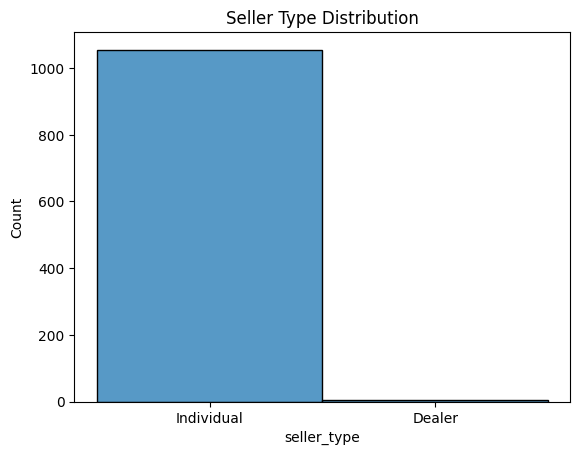

In [5]:
sns.histplot(x='seller_type', data=df)
plt.title("Seller Type Distribution")
plt.show()


Q4.  How many bikes have driven more than 50,000 kilometers?

In [6]:
bikes_over_50k = df[df['km_driven'] > 50000]
count = bikes_over_50k.shape[0]
print(count)

170


Q5. What is the average km_driven value for each ownership type?

In [7]:
avg_kms_by_owner = df.groupby('owner')['km_driven'].mean()
print(avg_kms_by_owner)

owner
1st owner     32816.583333
2nd owner     39288.991870
3rd owner     33292.181818
4th owner    311500.000000
Name: km_driven, dtype: float64


Q6. What proportion of bikes are from the year 2015 or older?

In [8]:
prop_of_bickes_2015 = (df['year'] >= 2015).mean()
print(prop_of_bickes_2015)


0.527803958529689


Q7. What is the trend of missing values across the dataset?

In [9]:
missing_values = df.isnull().sum()

print("Missing values per column:")
print(missing_values[missing_values > 0])


Missing values per column:
ex_showroom_price    435
dtype: int64


Q8. What is the highest ex_showroom_price recorded, and for which bike?

In [10]:
# Find the maximum ex_showroom_price
max_price = df['ex_showroom_price'].max()

most_expensive_bike = df[df['ex_showroom_price'] == max_price]

print("Highest Ex-Showroom Price:")
print(max_price)

print("\nBike(s) with the highest Ex-Showroom Price:")
print(most_expensive_bike[['name', 'ex_showroom_price']])


Highest Ex-Showroom Price:
1278000.0

Bike(s) with the highest Ex-Showroom Price:
                           name  ex_showroom_price
134  Harley-Davidson Street Bob          1278000.0


Q9. What is the total number of bikes listed by each seller type?

In [11]:
seller_counts = df['seller_type'].value_counts()

print("Number of bikes listed by each seller type:")
print(seller_counts)

Number of bikes listed by each seller type:
seller_type
Individual    1055
Dealer           6
Name: count, dtype: int64


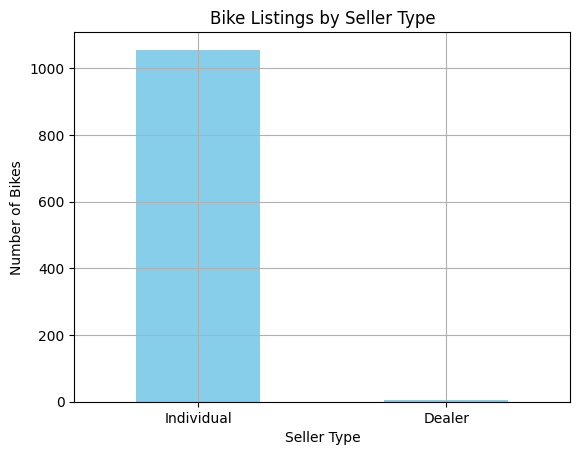

In [12]:
seller_counts.plot(kind='bar', color='skyblue')
plt.title('Bike Listings by Seller Type')
plt.xlabel('Seller Type')
plt.ylabel('Number of Bikes')
plt.xticks(rotation=0)
plt.grid(True)
plt.show()


Q10. What is the relationship between selling_price and km_driven for first-owner bikes?

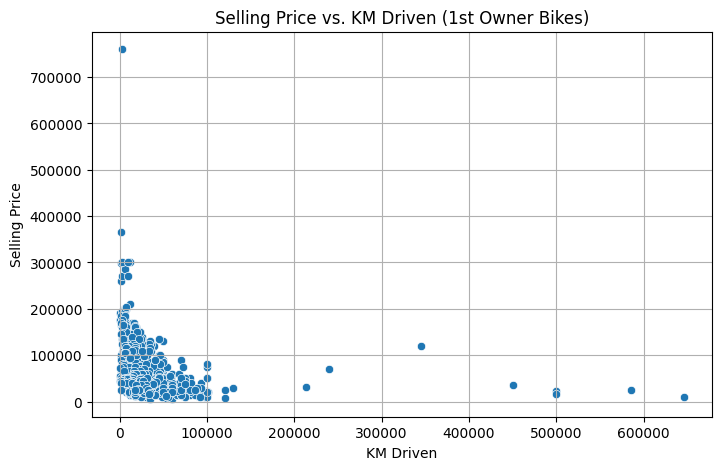

In [13]:
first_owner_bikes = df[df['owner'] == '1st owner']

plt.figure(figsize=(8,5))
sns.scatterplot(x='km_driven', y='selling_price', data=first_owner_bikes)
plt.title('Selling Price vs. KM Driven (1st Owner Bikes)')
plt.xlabel('KM Driven')
plt.ylabel('Selling Price')
plt.grid(True)
plt.show()


Q11. Identify and remove outliers in the km_driven column using the IQR method.

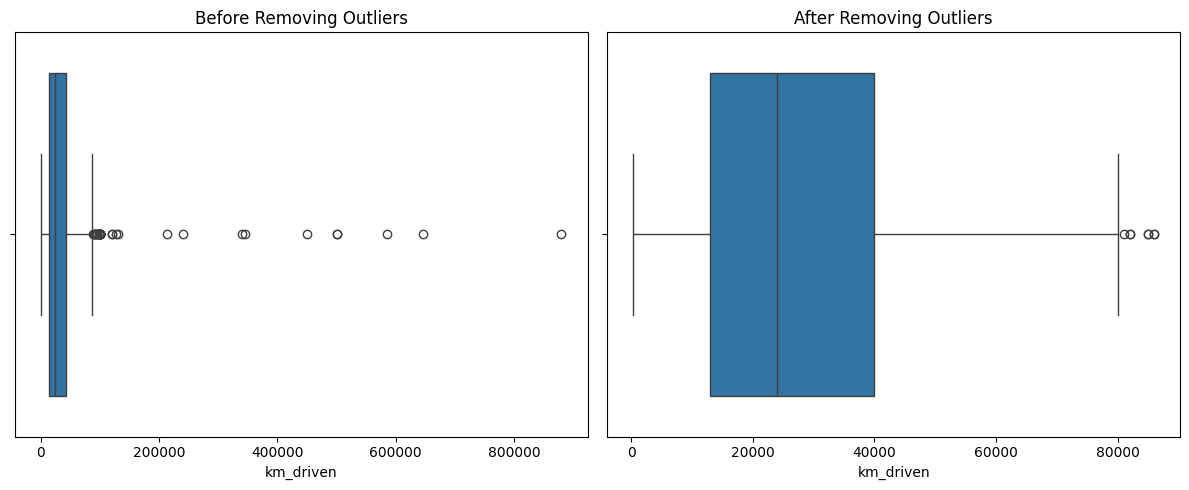

In [14]:
Q1 = df['km_driven'].quantile(0.25)
Q3 = df['km_driven'].quantile(0.75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Define the upper and lower bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the DataFrame to exclude outliers
df_no_outliers = df[(df['km_driven'] >= lower_bound) & (df['km_driven'] <= upper_bound)].copy()

plt.figure(figsize=(12,5))

# Before
plt.subplot(1, 2, 1)
sns.boxplot(x=df['km_driven'])
plt.title("Before Removing Outliers")

# After
plt.subplot(1, 2, 2)
sns.boxplot(x=df_no_outliers['km_driven'])
plt.title("After Removing Outliers")

plt.tight_layout()
plt.show()

Q12.  Perform a bivariate analysis to visualize the relationship between year and selling_price.

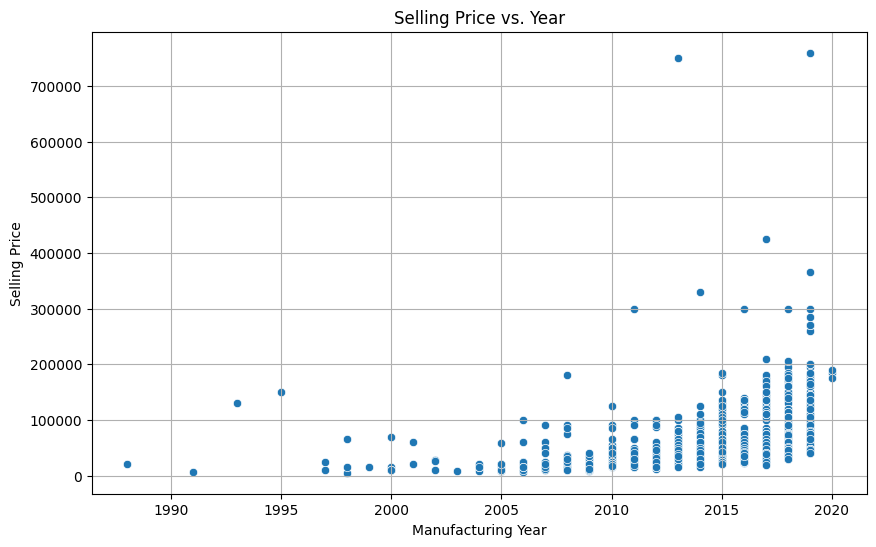

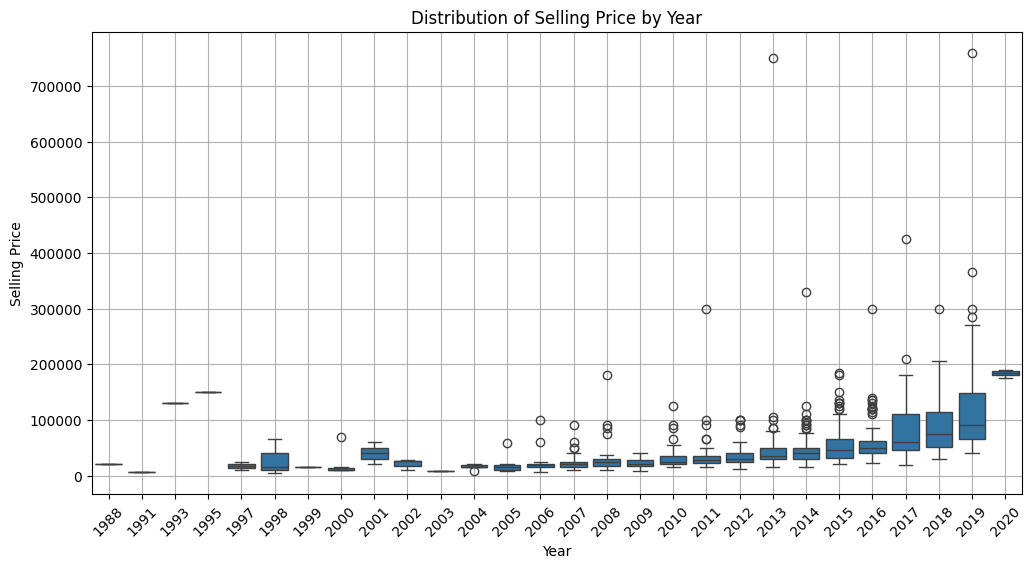

In [40]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='year', y='selling_price', data=df)
plt.title('Selling Price vs. Year')
plt.xlabel('Manufacturing Year')
plt.ylabel('Selling Price')
plt.grid(True)

plt.figure(figsize=(12,6))
sns.boxplot(x='year', y='selling_price', data=df)
plt.title('Distribution of Selling Price by Year')
plt.xlabel('Year')
plt.ylabel('Selling Price')
plt.xticks(rotation=45)
plt.grid(True)

plt.show()


Q13. What is the average depreciation in selling price based on the bike's age (current year - manufacturing
year)?

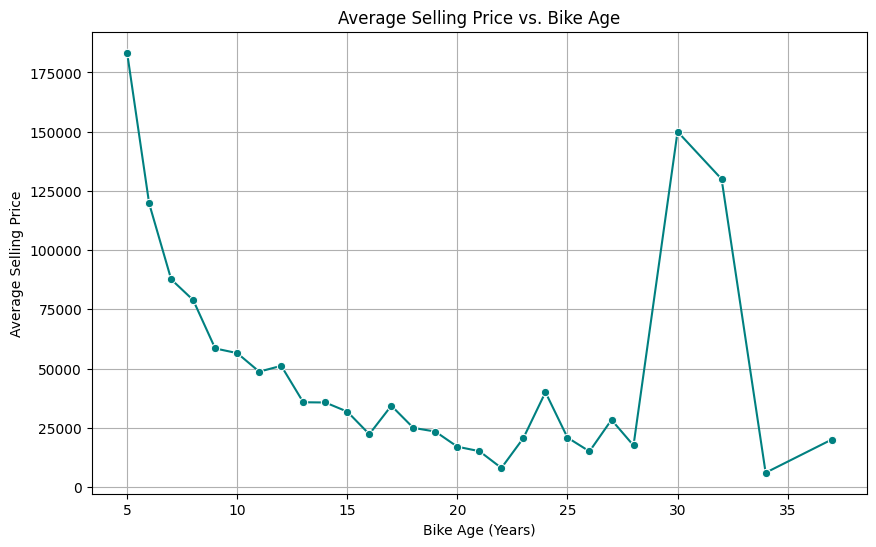

In [41]:
df['bike_age'] = 2025 - df['year']  # Change 2025 to the current year if needed

# Step 2: Group by bike age and calculate average selling price
avg_price_by_age = df.groupby('bike_age')['selling_price'].mean().reset_index()

# Step 3: Plot the result
plt.figure(figsize=(10,6))
sns.lineplot(data=avg_price_by_age, x='bike_age', y='selling_price', marker='o', color='teal')
plt.title('Average Selling Price vs. Bike Age')
plt.xlabel('Bike Age (Years)')
plt.ylabel('Average Selling Price')
plt.grid(True)
plt.show()

Q14.  Which bike names are priced significantly above the average price for their manufacturing year?

In [43]:
# Step 1: Calculate the average and standard deviation of price per year
year_price_stats = df.groupby('year')['selling_price'].agg(['mean', 'std']).reset_index()
year_price_stats.rename(columns={'mean': 'avg_price', 'std': 'std_dev'}, inplace=True)

# Step 2: Merge the stats back to the original DataFrame
# Make sure the merge is happening correctly and updating the df
df = df.merge(year_price_stats, on='year', how='left') # Use 'left' merge to keep all rows from df

# Add a print statement to check columns after merge
# print(df.columns)

# Step 3: Identify bikes priced above (mean + 1 * std) for their year
# Add a check for the existence of the columns before using them
if 'avg_price' in df.columns and 'std_dev' in df.columns:
    df['high_price_flag'] = df['selling_price'] > (df['avg_price'] + df['std_dev'])

    # Step 4: Filter the high-priced bikes
    high_priced_bikes = df[df['high_price_flag'] == True][['name', 'year', 'selling_price', 'avg_price', 'std_dev']]

    # Step 5: Display the result
    print("Bikes priced significantly above average for their year:")
    print(high_priced_bikes)
else:
    print("Merge failed: 'avg_price' or 'std_dev' columns not found in df after merge.")

Bikes priced significantly above average for their year:
                                     name  year  selling_price      avg_price  \
2     Royal Enfield Classic Gunmetal Grey  2018         150000   87660.374046   
7    Royal Enfield Bullet 350 [2007-2011]  2008         180000   34289.285714   
13                          Yamaha YZF R3  2019         365000  119689.511628   
18    Royal Enfield Classic Gunmetal Grey  2018         150000   87660.374046   
24          Royal Enfield Thunderbird 350  2016         110000   58469.018692   
..                                    ...   ...            ...            ...   
976             Royal Enfield Classic 350  2015         110000   56500.000000   
979             Royal Enfield Thunder 500  2015         105000   56500.000000   
983             Royal Enfield Classic 350  2015         100000   56500.000000   
984             Royal Enfield Classic 500  2014          95000   48668.131868   
985             Royal Enfield Classic 500  2011     

Q15. Develop a correlation matrix for numeric columns and visualize it using a heatmap.

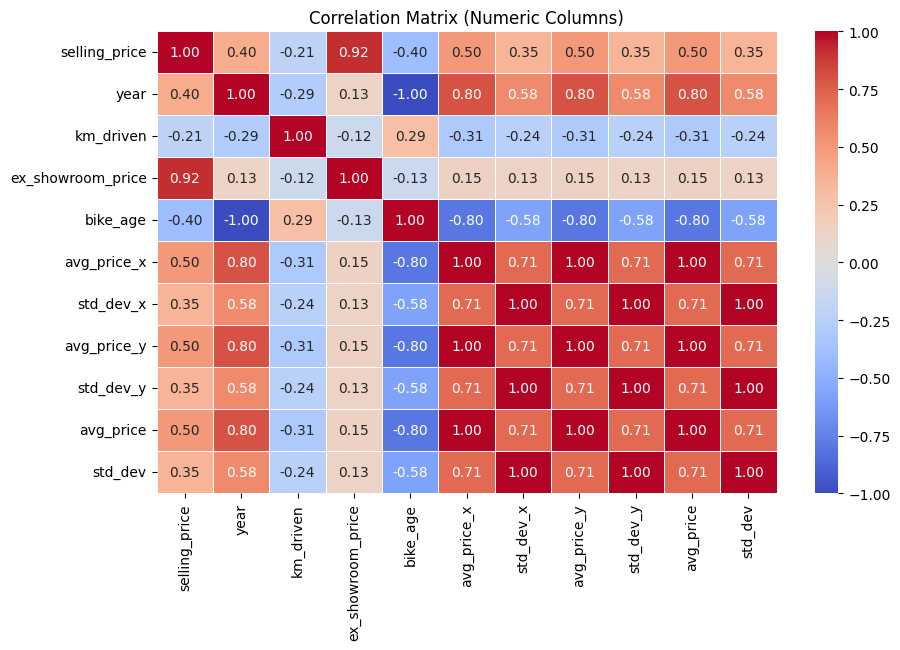

In [44]:
# Step 1: Select only numeric columns
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Step 2: Compute the correlation matrix
correlation_matrix = numeric_df.corr()

# Step 3: Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix (Numeric Columns)")
plt.show()


## EDA (2) Car Sale Dataset

In [45]:
df1 = pd.read_csv('Car_Sale.csv')
print(df1)

             Car_id        Date Customer Name  Gender  Annual Income  \
0      C_CND_000001    1/2/2022     Geraldine    Male          13500   
1      C_CND_000002    1/2/2022           Gia    Male        1480000   
2      C_CND_000003    1/2/2022        Gianna    Male        1035000   
3      C_CND_000004    1/2/2022       Giselle    Male          13500   
4      C_CND_000005    1/2/2022         Grace    Male        1465000   
...             ...         ...           ...     ...            ...   
23901  C_CND_023902  12/31/2023        Martin    Male          13500   
23902  C_CND_023903  12/31/2023         Jimmy  Female         900000   
23903  C_CND_023904  12/31/2023          Emma    Male         705000   
23904  C_CND_023905  12/31/2023      Victoire    Male          13500   
23905  C_CND_023906  12/31/2023       Donovan    Male        1225000   

                               Dealer_Name    Company       Model  \
0      Buddy Storbeck's Diesel Service Inc       Ford  Expedition 

Q1. What is the average selling price of cars for each dealer, and how does it compare across different dealers?

Average Selling Price by Dealer:
Dealer_Name
U-Haul CO                                          28769.919006
Classic Chevy                                      28602.014446
Rabun Used Car Sales                               28527.536177
Iceberg Rentals                                    28522.958533
Enterprise Rent A Car                              28312.580800
Scrivener Performance Engineering                  28297.371589
Gartner Buick Hyundai Saab                         28247.621019
Saab-Belle Dodge                                   28190.139888
Capitol KIA                                        28189.703822
Race Car Help                                      28163.372706
Chrysler of Tri-Cities                             28123.091054
Star Enterprises Inc                               28113.055244
Suburban Ford                                      28112.206758
C & M Motors Inc                                   28111.755200
Tri-State Mack Inc                                 28095.56

/tmp/ipython-input-46-1053248006.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_price_by_dealer.head(10).index, y=avg_price_by_dealer.head(10).values, palette='coolwarm')


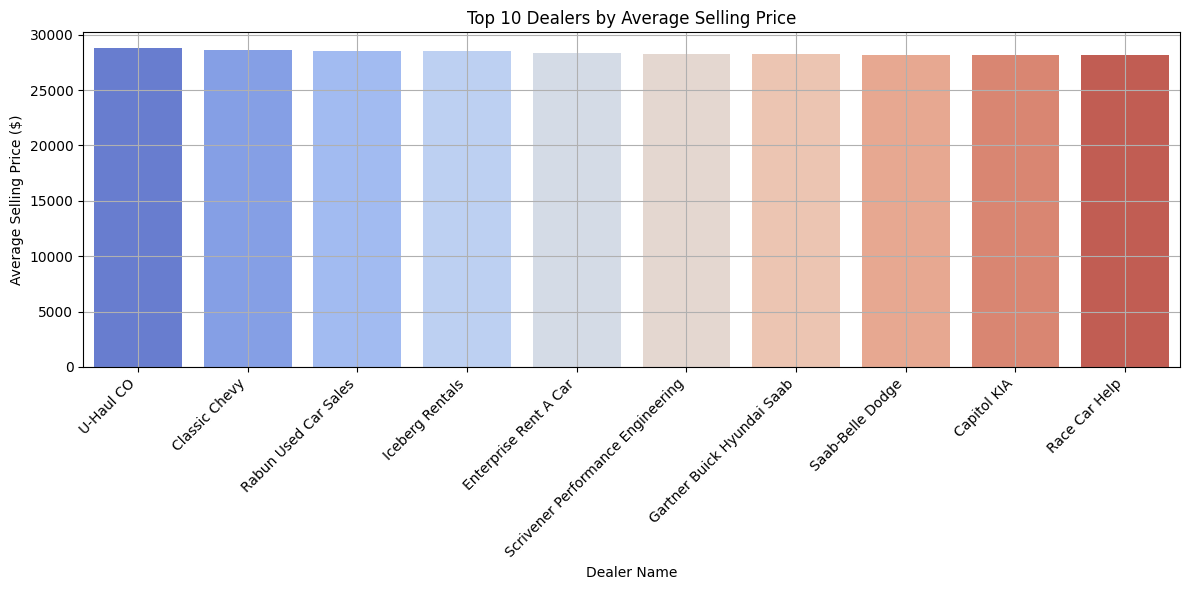

In [46]:
avg_price_by_dealer = df1.groupby('Dealer_Name')['Price ($)'].mean().sort_values(ascending=False)

print("Average Selling Price by Dealer:")
print(avg_price_by_dealer)

plt.figure(figsize=(12,6))
sns.barplot(x=avg_price_by_dealer.head(10).index, y=avg_price_by_dealer.head(10).values, palette='coolwarm')
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Dealers by Average Selling Price')
plt.xlabel('Dealer Name')
plt.ylabel('Average Selling Price ($)')
plt.tight_layout()
plt.grid(True)
plt.show()

Q2.  Which car brand (Company) has the highest variation in prices, and what does this tell us about the pricing
trends?

In [48]:
# Step 1: Group by Company and calculate price standard deviation
price_variation = df1.groupby('Company')['Price ($)'].std().sort_values(ascending=False)

# Step 2: Display top companies with highest variation
print("Price Variation (Standard Deviation) by Company:")
print(price_variation.head(10))

# Step 3: Find the company with the highest variation
most_variable_brand = price_variation.idxmax()
highest_std = price_variation.max()

print(f"\n Company with highest price variation: {most_variable_brand}")
print(f" Standard Deviation: ${highest_std:.2f}")


Price Variation (Standard Deviation) by Company:
Company
Lincoln     19658.050211
Saab        19653.740089
Cadillac    19517.120220
Plymouth    19065.997338
Lexus       17852.923492
Buick       17142.232626
Mercury     16445.172195
Nissan      16214.264017
Saturn      15990.223671
Ford        15849.090227
Name: Price ($), dtype: float64

 Company with highest price variation: Lincoln
 Standard Deviation: $19658.05


Q3. What is the distribution of car prices for each transmission type, and how do the interquartile ranges
compare?

/tmp/ipython-input-49-4192388220.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Transmission', y='Price ($)', data=df1, palette='Set2')


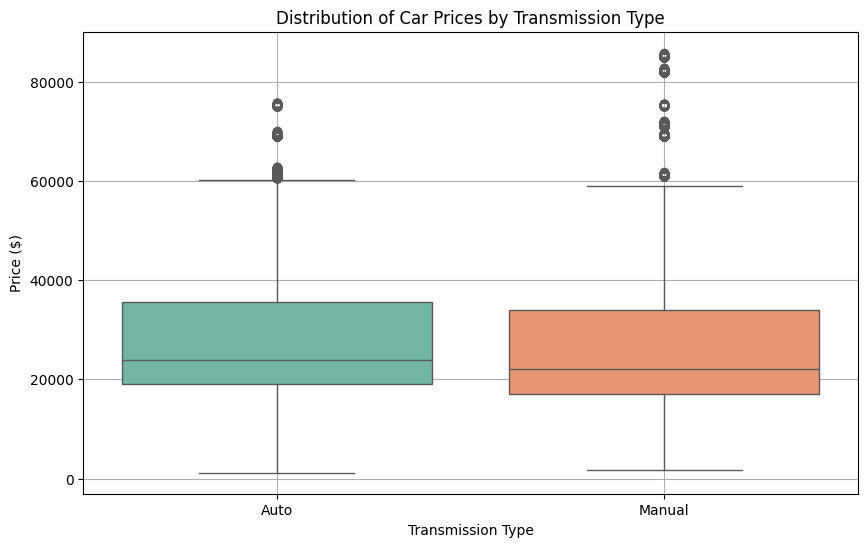

Interquartile Range (IQR) by Transmission Type:
                  25%      75%      IQR
Transmission                           
Auto          19000.0  35500.0  16500.0
Manual        17000.0  34000.0  17000.0


In [49]:
# Step 1: Boxplot of price by transmission type
plt.figure(figsize=(10, 6))
sns.boxplot(x='Transmission', y='Price ($)', data=df1, palette='Set2')
plt.title('Distribution of Car Prices by Transmission Type')
plt.xlabel('Transmission Type')
plt.ylabel('Price ($)')
plt.grid(True)
plt.show()

# Step 2: Calculate Q1, Q3, IQR for each Transmission type
iqr_summary = df1.groupby('Transmission')['Price ($)'].describe()[['25%', '75%']]
iqr_summary['IQR'] = iqr_summary['75%'] - iqr_summary['25%']

print("Interquartile Range (IQR) by Transmission Type:")
print(iqr_summary)


Q4. What is the distribution of car prices across different regions?

/tmp/ipython-input-50-2208868931.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Dealer_Region', y='Price ($)', data=df1, palette='coolwarm')


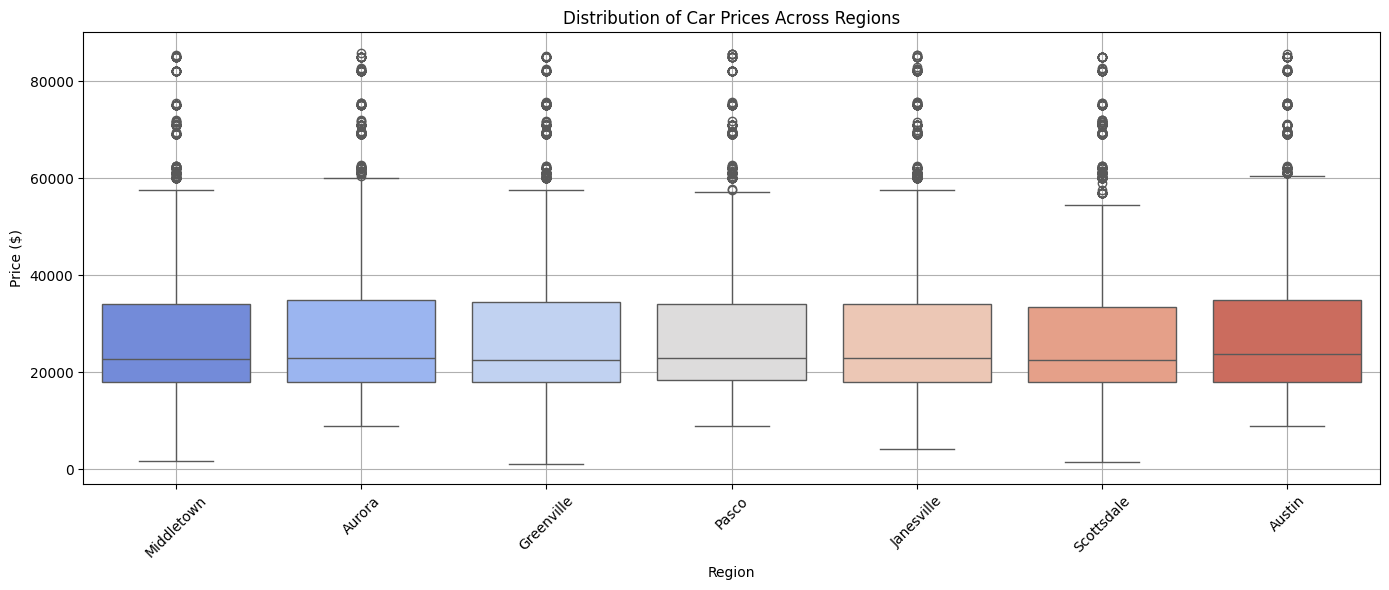

In [50]:
plt.figure(figsize=(14, 6))
sns.boxplot(x='Dealer_Region', y='Price ($)', data=df1, palette='coolwarm')
plt.title('Distribution of Car Prices Across Regions')
plt.xlabel('Region')
plt.ylabel('Price ($)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

Q5. What is the distribution of cars based on body styles?

Number of Cars by Body Style:
Body Style
SUV          6374
Hatchback    6128
Sedan        4488
Passenger    3945
Hardtop      2971
Name: count, dtype: int64


/tmp/ipython-input-51-673314671.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=body_style_counts.index, y=body_style_counts.values, palette='pastel')


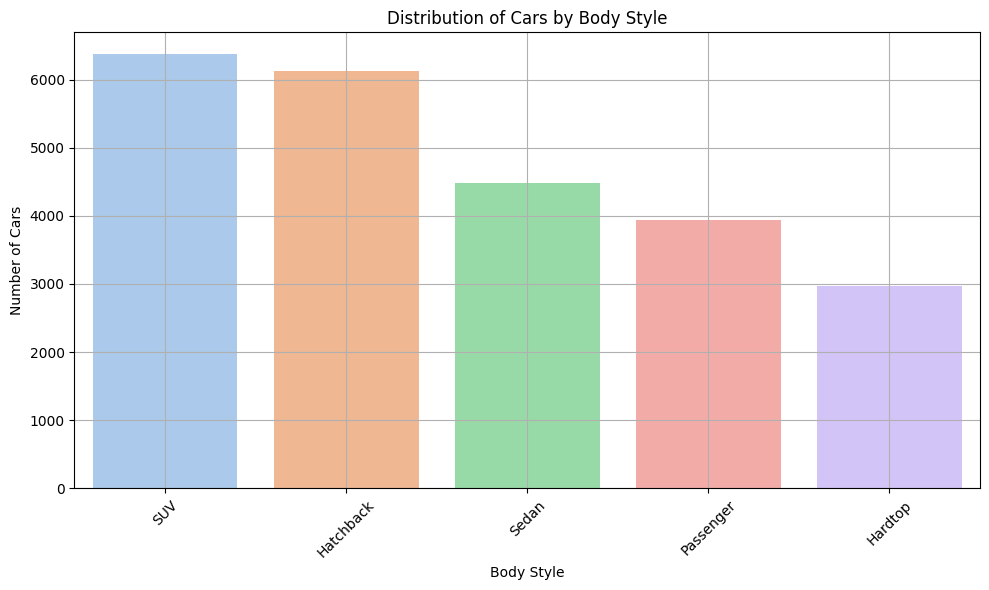

In [51]:
# Step 1: Count cars per body style
body_style_counts = df1['Body Style'].value_counts()

# Step 2: Print the counts
print("Number of Cars by Body Style:")
print(body_style_counts)

# Step 3: Bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=body_style_counts.index, y=body_style_counts.values, palette='pastel')
plt.title('Distribution of Cars by Body Style')
plt.xlabel('Body Style')
plt.ylabel('Number of Cars')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


Q6. How does the average selling price of cars vary by customer gender and annual income?

Average Selling Price by Gender and Annual Income:
   Gender  Annual Income     Price ($)
0  Female          13500  28132.038732
1  Female         106000  46001.000000
2  Female         121000  20000.000000
3  Female         190000  19001.000000
4  Female         211000  51000.000000


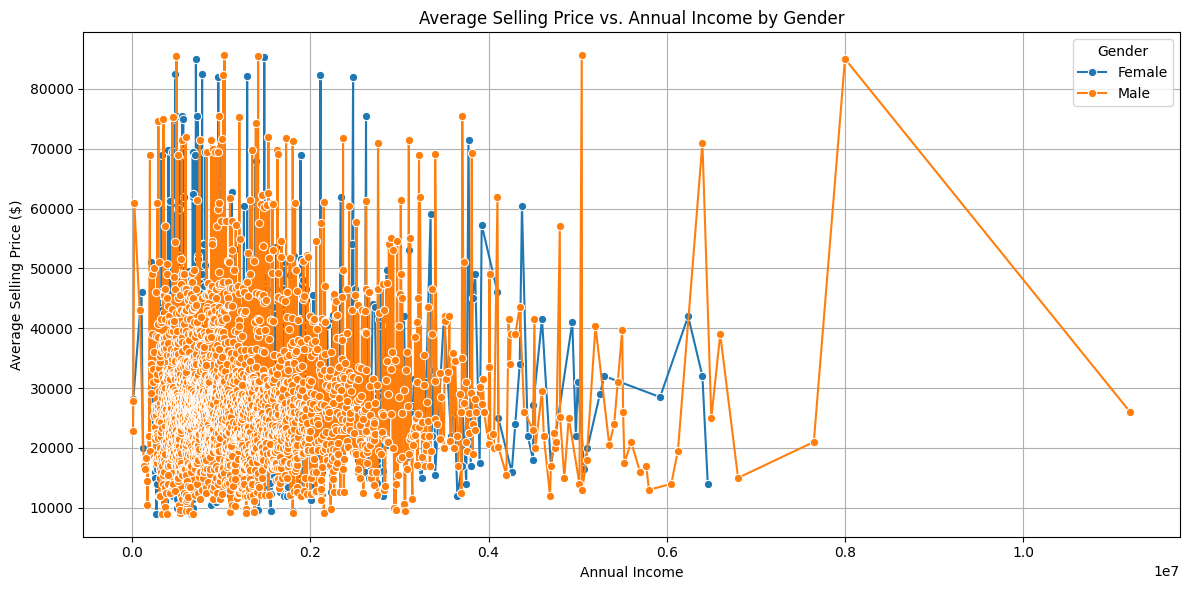

In [52]:
# Step 1: Group by Gender and Annual Income, and calculate average Price
avg_price = df1.groupby(['Gender', 'Annual Income'])['Price ($)'].mean().reset_index()

# Step 2: Display the result
print("Average Selling Price by Gender and Annual Income:")
print(avg_price.head())

# Step 3: Visualization using line plot
plt.figure(figsize=(12,6))
sns.lineplot(data=avg_price, x='Annual Income', y='Price ($)', hue='Gender', marker='o')
plt.title('Average Selling Price vs. Annual Income by Gender')
plt.xlabel('Annual Income')
plt.ylabel('Average Selling Price ($)')
plt.grid(True)
plt.tight_layout()
plt.show()

Q7.  What is the distribution of car prices by region, and how does the number of cars sold vary by region?

/tmp/ipython-input-53-541383136.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Dealer_Region', y='Price ($)', data=df1, palette='Set3')


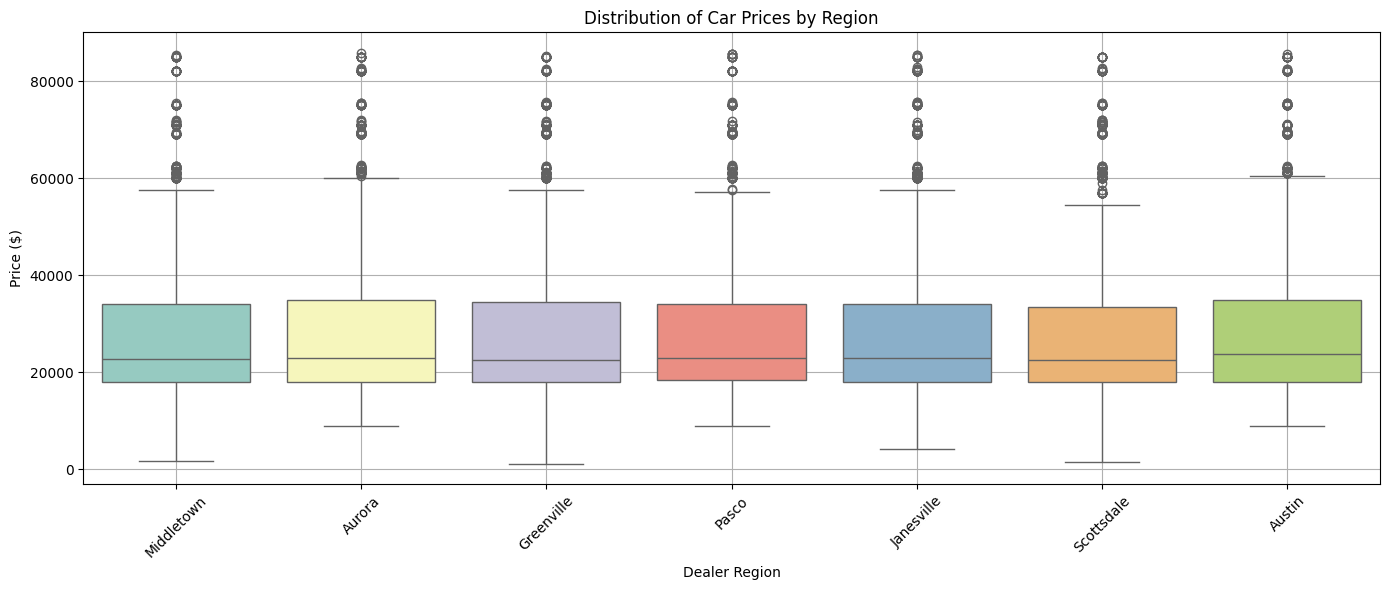

/tmp/ipython-input-53-541383136.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=car_counts.index, y=car_counts.values, palette='pastel')


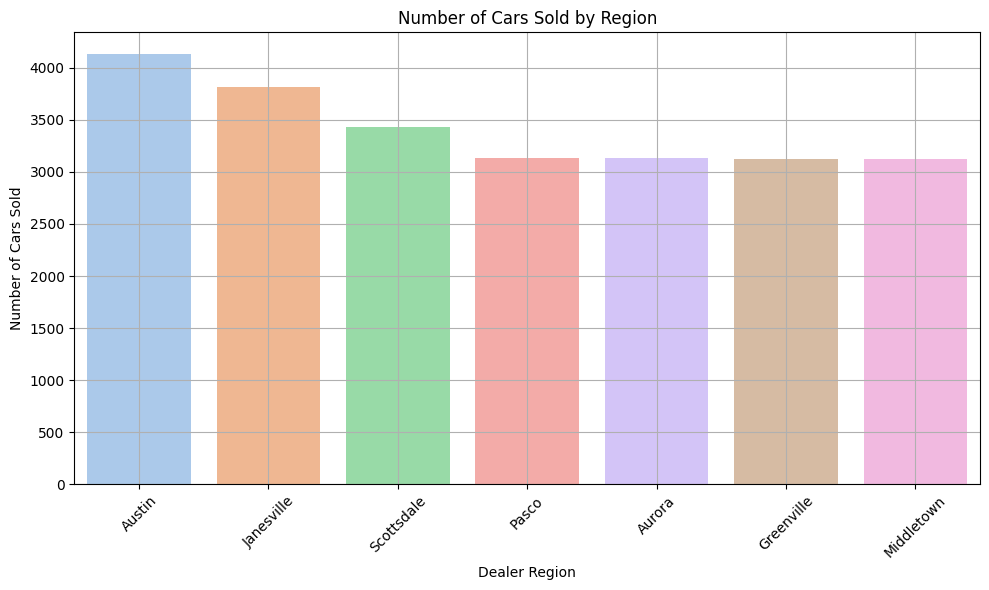

Number of Cars Sold by Region:
Dealer_Region
Austin        4135
Janesville    3821
Scottsdale    3433
Pasco         3131
Aurora        3130
Greenville    3128
Middletown    3128
Name: count, dtype: int64


In [53]:
# Step 1: Boxplot of car prices by region (shows price distribution)
plt.figure(figsize=(14,6))
sns.boxplot(x='Dealer_Region', y='Price ($)', data=df1, palette='Set3')
plt.title('Distribution of Car Prices by Region')
plt.xlabel('Dealer Region')
plt.ylabel('Price ($)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# Step 2: Count the number of cars sold in each region
car_counts = df1['Dealer_Region'].value_counts()

# Step 3: Plot number of cars sold per region
plt.figure(figsize=(10,6))
sns.barplot(x=car_counts.index, y=car_counts.values, palette='pastel')
plt.title('Number of Cars Sold by Region')
plt.xlabel('Dealer Region')
plt.ylabel('Number of Cars Sold')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# Optional: Print exact numbers
print("Number of Cars Sold by Region:")
print(car_counts)


Q8. How does the average car price differ between cars with different engine sizes?

Average Price by Engine Type:
Engine
DoubleÂ Overhead Camshaft    28248.525972
Overhead Camshaft            27914.710631
Name: Price ($), dtype: float64


/tmp/ipython-input-54-1308617542.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_price_by_engine.index, y=avg_price_by_engine.values, palette='muted')


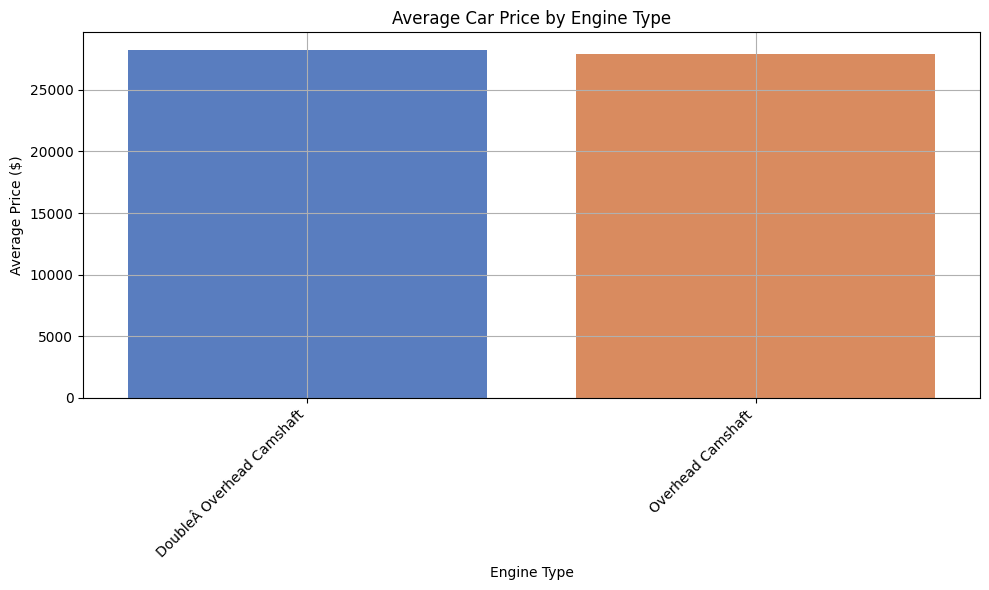

In [54]:
# Step 1: Group by Engine and calculate average price
avg_price_by_engine = df1.groupby('Engine')['Price ($)'].mean().sort_values(ascending=False)

# Step 2: Show average prices
print("Average Price by Engine Type:")
print(avg_price_by_engine)

# Step 3: Plot the results
plt.figure(figsize=(10,6))
sns.barplot(x=avg_price_by_engine.index, y=avg_price_by_engine.values, palette='muted')
plt.xticks(rotation=45, ha='right')
plt.title('Average Car Price by Engine Type')
plt.xlabel('Engine Type')
plt.ylabel('Average Price ($)')
plt.tight_layout()
plt.grid(True)
plt.show()

Q9. How do car prices vary based on the customer’s annual income bracket?

/tmp/ipython-input-55-26559988.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_price = df1.groupby('Income Bracket')['Price ($)'].mean().reset_index()
/tmp/ipython-input-55-26559988.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_price, x='Income Bracket', y='Price ($)', palette='coolwarm')


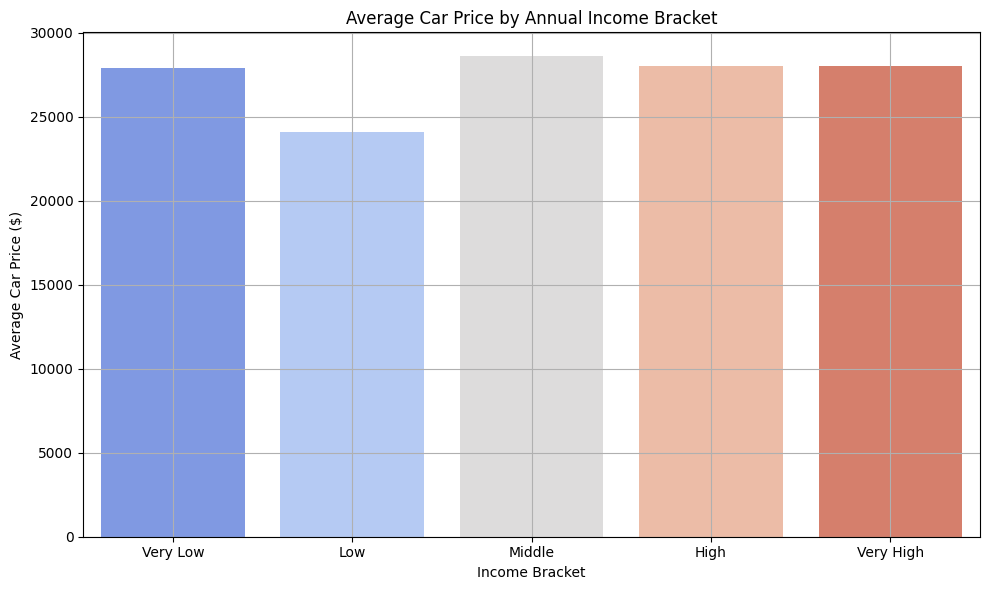

In [55]:
# Step 1: Define income brackets
bins = [0, 50000, 200000, 500000, 1000000, 2000000]
labels = ['Very Low', 'Low', 'Middle', 'High', 'Very High']

df1['Income Bracket'] = pd.cut(df1['Annual Income'], bins=bins, labels=labels)

# Step 2: Calculate average car price per income bracket
avg_price = df1.groupby('Income Bracket')['Price ($)'].mean().reset_index()

# Step 3: Bar chart of average price by income bracket
plt.figure(figsize=(10,6))
sns.barplot(data=avg_price, x='Income Bracket', y='Price ($)', palette='coolwarm')
plt.title('Average Car Price by Annual Income Bracket')
plt.xlabel('Income Bracket')
plt.ylabel('Average Car Price ($)')
plt.grid(True)
plt.tight_layout()
plt.show()

Q10.  What are the top 5 car models with the highest number of sales, and how does their price distribution look?

Top 5 Most Sold Models:
Index(['Diamante', 'Prizm', 'Silhouette', 'Passat', 'Ram Pickup'], dtype='object', name='Model')


/tmp/ipython-input-56-1406234473.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Model', y='Price ($)', data=top_model_data, palette='pastel')


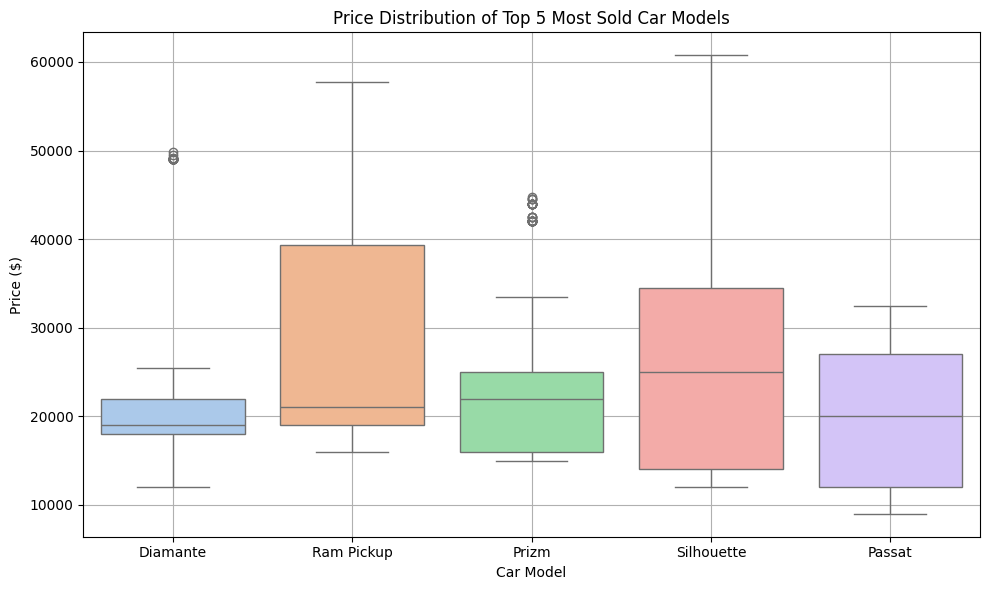

In [56]:
# Step 1: Find top 5 car models by number of sales
top_models = df1['Model'].value_counts().head(5).index
print("Top 5 Most Sold Models:")
print(top_models)

# Step 2: Filter dataset to only include these top 5 models
top_model_data = df1[df1['Model'].isin(top_models)]

# Step 3: Plot price distribution for each of the top 5 models
plt.figure(figsize=(10,6))
sns.boxplot(x='Model', y='Price ($)', data=top_model_data, palette='pastel')
plt.title('Price Distribution of Top 5 Most Sold Car Models')
plt.xlabel('Car Model')
plt.ylabel('Price ($)')
plt.grid(True)
plt.tight_layout()
plt.show()

Q11. How does car price vary with engine size across different car colors, and which colors have the highest price
variation?

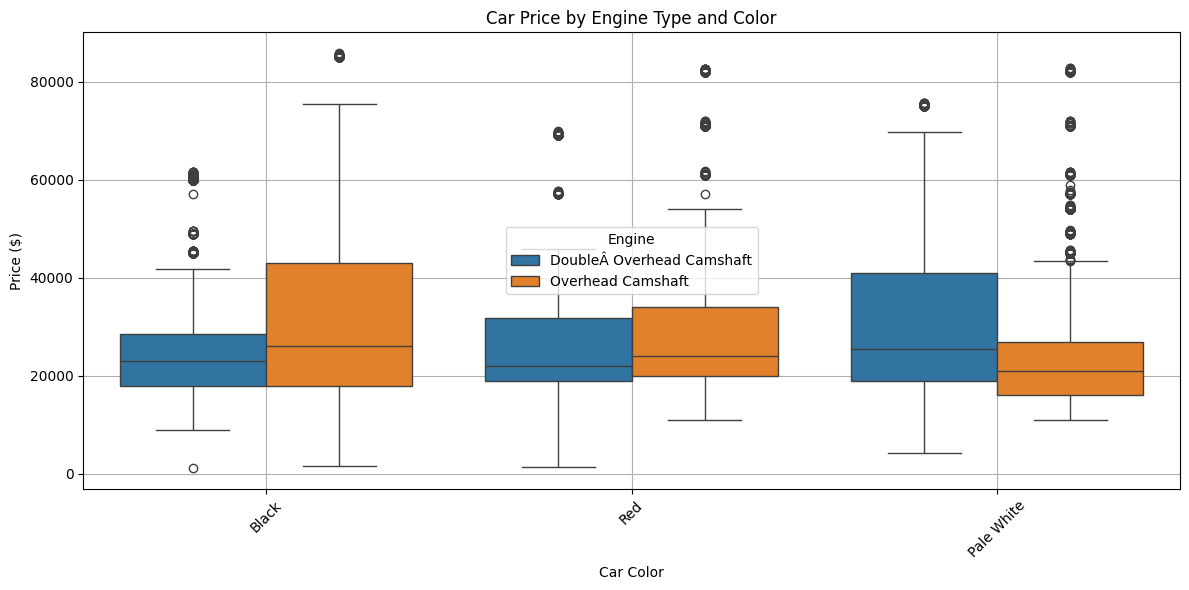

Top 5 Colors with Highest Price Variation:
Color
Red           15519.360962
Black         15286.065976
Pale White    14077.346859
Name: Price ($), dtype: float64


In [57]:
# Step 1: Plot relationship between Engine and Price for each Color
plt.figure(figsize=(12, 6))
sns.boxplot(data=df1, x='Color', y='Price ($)', hue='Engine')
plt.title('Car Price by Engine Type and Color')
plt.xlabel('Car Color')
plt.ylabel('Price ($)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# Group by Color and calculate standard deviation of price
color_variation = df1.groupby('Color')['Price ($)'].std().sort_values(ascending=False)

# Print top 5 colors with highest variation
print("Top 5 Colors with Highest Price Variation:")
print(color_variation.head(5))

Q12.  Is there any seasonal trend in car sales based on the date of sale.

/tmp/ipython-input-58-1682735331.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=monthly_sales.index, y=monthly_sales.values, palette='coolwarm')


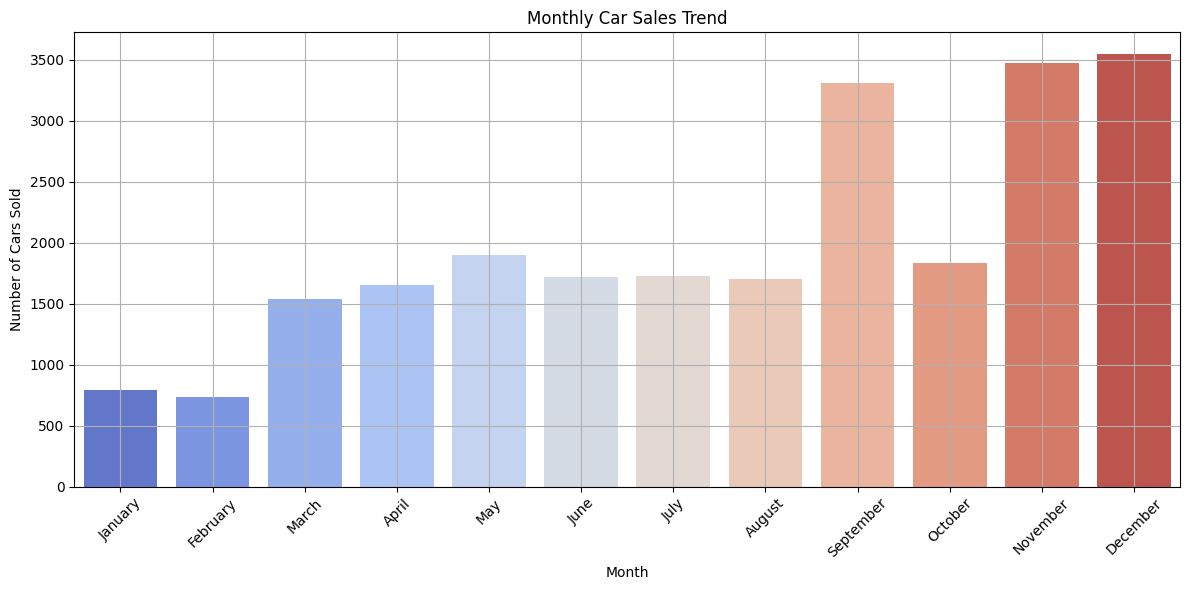

In [58]:
# Step 1: Convert 'Date' column to datetime format
df1['Date'] = pd.to_datetime(df1['Date'])

# Step 2: Extract Month and create a new column
df1['Month'] = df1['Date'].dt.month_name()  # or use .dt.month for numeric

# Optional: To keep months in order
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

# Step 3: Count cars sold per month
monthly_sales = df1['Month'].value_counts().reindex(month_order)

# Step 4: Plot sales by month
plt.figure(figsize=(12,6))
sns.barplot(x=monthly_sales.index, y=monthly_sales.values, palette='coolwarm')
plt.title('Monthly Car Sales Trend')
plt.xlabel('Month')
plt.ylabel('Number of Cars Sold')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

Q13.  How does the car price distribution change when considering different combinations of body style and
transmission type?

/tmp/ipython-input-59-2305465416.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df1, x='Body_Transmission', y='Price ($)', palette='Set3')


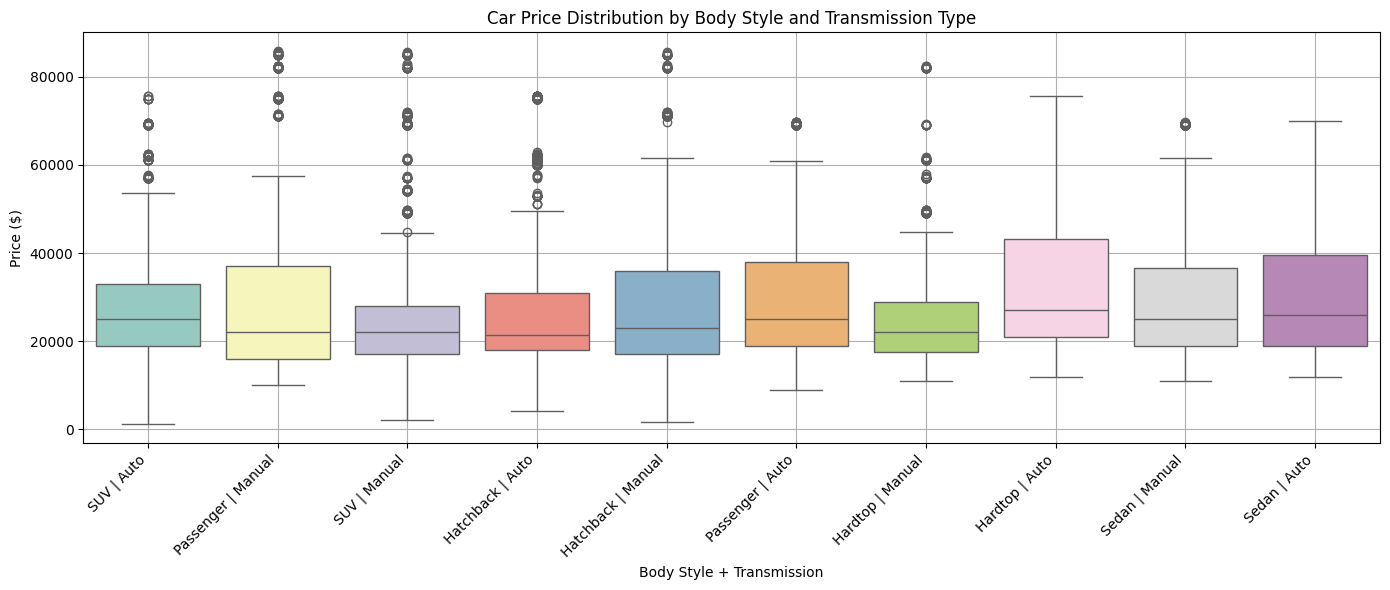

In [59]:
# Step 1: Create a new column combining Body Style and Transmission
df1['Body_Transmission'] = df1['Body Style'] + ' | ' + df1['Transmission']

# Step 2: Boxplot of Price by Body_Transmission
plt.figure(figsize=(14, 6))
sns.boxplot(data=df1, x='Body_Transmission', y='Price ($)', palette='Set3')
plt.title('Car Price Distribution by Body Style and Transmission Type')
plt.xlabel('Body Style + Transmission')
plt.ylabel('Price ($)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(True)
plt.show()

Q14.  What is the correlation between car price, engine size, and annual income of customers, and how do these
features interact?

Correlation Matrix:
               Price ($)  Annual Income  Engine_Level
Price ($)       1.000000       0.001084           NaN
Annual Income   0.001084       1.000000           NaN
Engine_Level         NaN            NaN           NaN


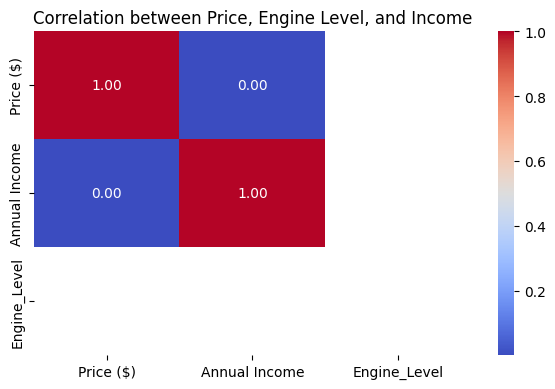

In [60]:
# Step 1: Map engine types to numeric scores
engine_mapping = {
    'Overhead Camshaft': 1,
    'Double Overhead Camshaft': 2,
    'Single Overhead Camshaft': 1,
    'Turbocharged': 3,
    # Add other mappings as needed
}
df1['Engine_Level'] = df1['Engine'].map(engine_mapping)

# Step 2: Select only numeric columns
corr_df = df1[['Price ($)', 'Annual Income', 'Engine_Level']].dropna()

# Step 3: Correlation matrix
corr_matrix = corr_df.corr()

print("Correlation Matrix:")
print(corr_matrix)

# Step 4: Heatmap visualization
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation between Price, Engine Level, and Income")
plt.tight_layout()
plt.show()



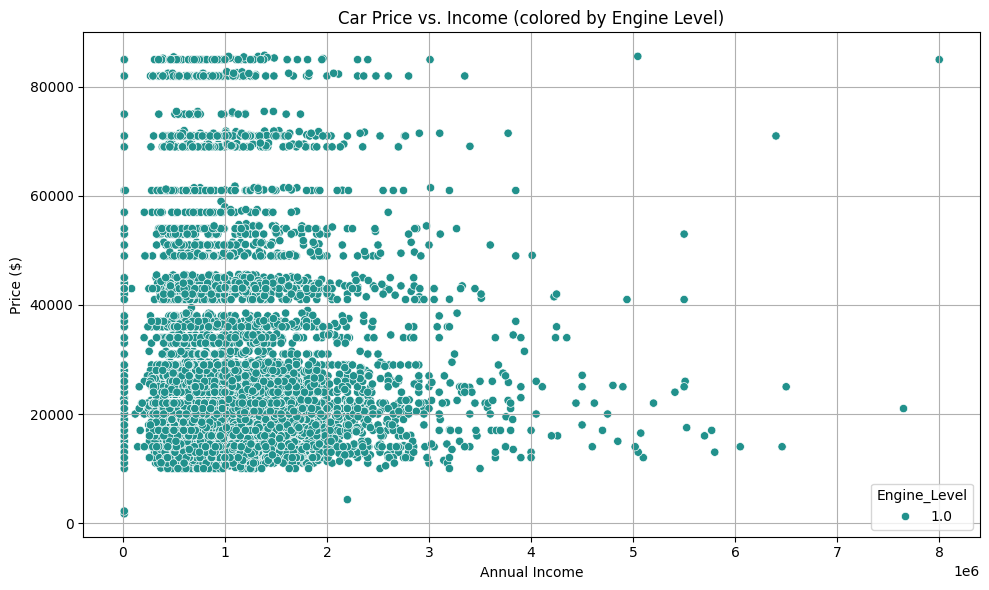

In [61]:
# Scatter plot of income vs price, colored by engine level
plt.figure(figsize=(10,6))
sns.scatterplot(data=df1, x='Annual Income', y='Price ($)', hue='Engine_Level', palette='viridis')
plt.title('Car Price vs. Income (colored by Engine Level)')
plt.grid(True)
plt.tight_layout()
plt.show()

Q15. How does the average car price vary across different car models and engine types?

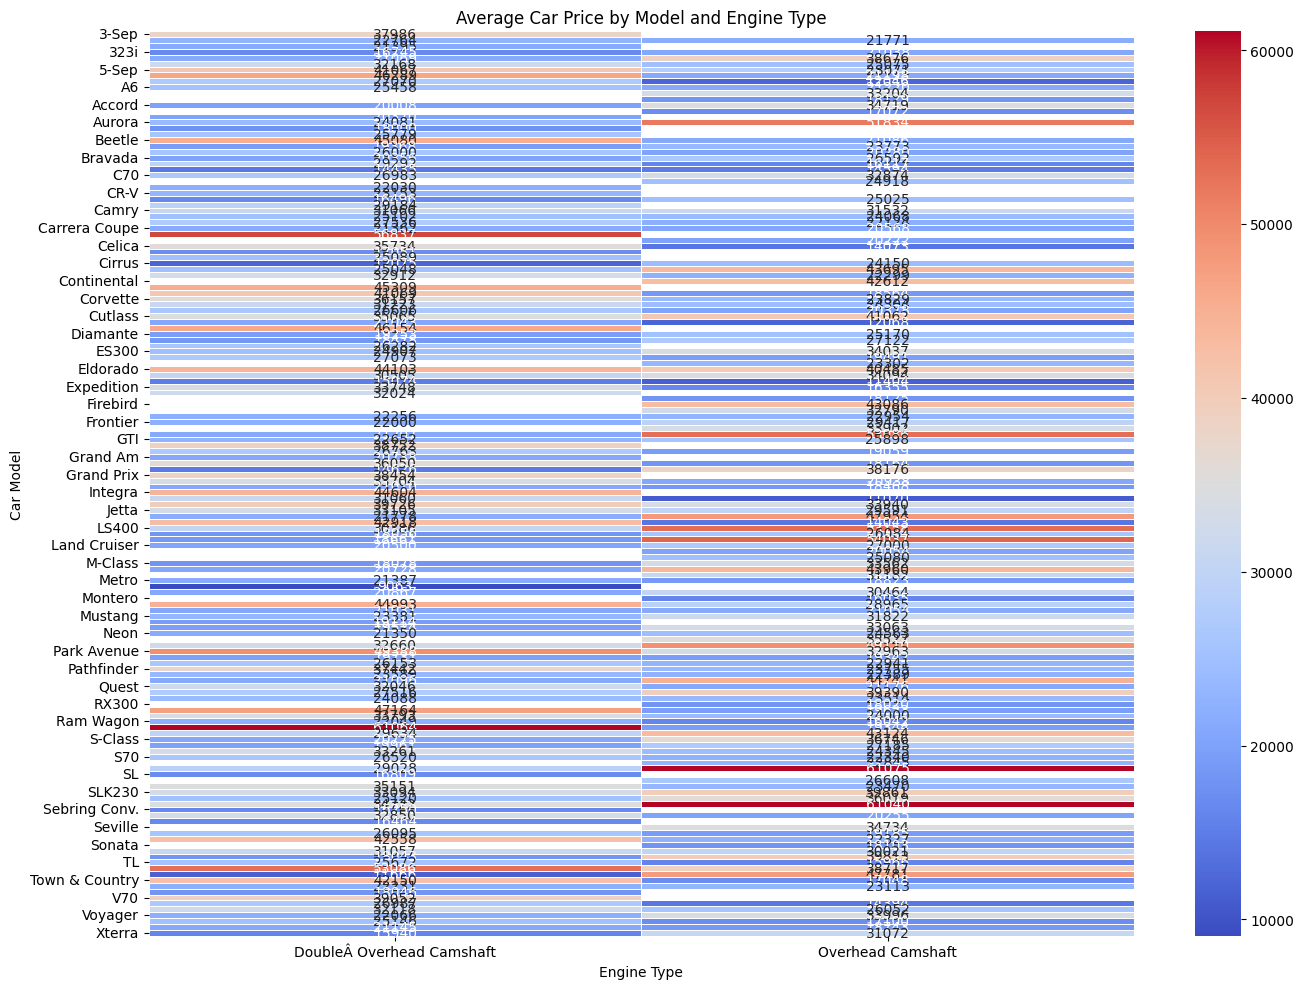

<Axes: xlabel='Engine', ylabel='Model'>

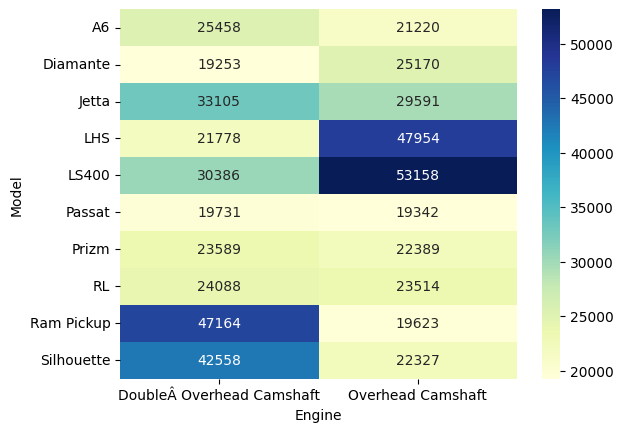

In [62]:
# Step 1: Group by Model and Engine to get average price
avg_price = df1.groupby(['Model', 'Engine'])['Price ($)'].mean().reset_index()

# Step 2: Pivot for heatmap
pivot_table = avg_price.pivot(index='Model', columns='Engine', values='Price ($)')

# Step 3: Plot heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(pivot_table, annot=True, fmt=".0f", cmap='coolwarm', linewidths=0.5)
plt.title('Average Car Price by Model and Engine Type')
plt.xlabel('Engine Type')
plt.ylabel('Car Model')
plt.tight_layout()
plt.show()

# Only show top 10 most frequent models for a cleaner plot
top_models = df1['Model'].value_counts().head(10).index
filtered_avg_price = avg_price[avg_price['Model'].isin(top_models)]

# Pivot and plot again
pivot_table = filtered_avg_price.pivot(index='Model', columns='Engine', values='Price ($)')
sns.heatmap(pivot_table, annot=True, fmt=".0f", cmap='YlGnBu')


## EDA (3) Amazon Sales Data

In [63]:
df2 = pd.read_csv('amazon.csv')
print(df2)

      product_id                                       product_name  \
0     B07JW9H4J1  Wayona Nylon Braided USB to Lightning Fast Cha...   
1     B098NS6PVG  Ambrane Unbreakable 60W / 3A Fast Charging 1.5...   
2     B096MSW6CT  Sounce Fast Phone Charging Cable & Data Sync U...   
3     B08HDJ86NZ  boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...   
4     B08CF3B7N1  Portronics Konnect L 1.2M Fast Charging 3A 8 P...   
...          ...                                                ...   
1460  B08L7J3T31  Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...   
1461  B01M6453MB  Prestige Delight PRWO Electric Rice Cooker (1 ...   
1462  B009P2LIL4  Bajaj Majesty RX10 2000 Watts Heat Convector R...   
1463  B00J5DYCCA  Havells Ventil Air DSP 230mm Exhaust Fan (Pist...   
1464  B01486F4G6  Borosil Jumbo 1000-Watt Grill Sandwich Maker (...   

                                               category discounted_price  \
0     Computers&Accessories|Accessories&Peripherals|...             ₹39

Q1.  What is the average rating for each product category?

Average Rating by Product Category:
category
Computers&Accessories|Tablets                                                                                    4.6
Computers&Accessories|NetworkingDevices|NetworkAdapters|PowerLANAdapters                                         4.5
Electronics|Cameras&Photography|Accessories|Film                                                                 4.5
Computers&Accessories|Components|Memory                                                                          4.5
Electronics|HomeAudio|MediaStreamingDevices|StreamingClients                                                     4.5
                                                                                                                ... 
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCMicrophones                               3.6
Electronics|HomeTheater,TV&Video|Accessories|3DGlasses                                                           3.5
Computers&Accessori

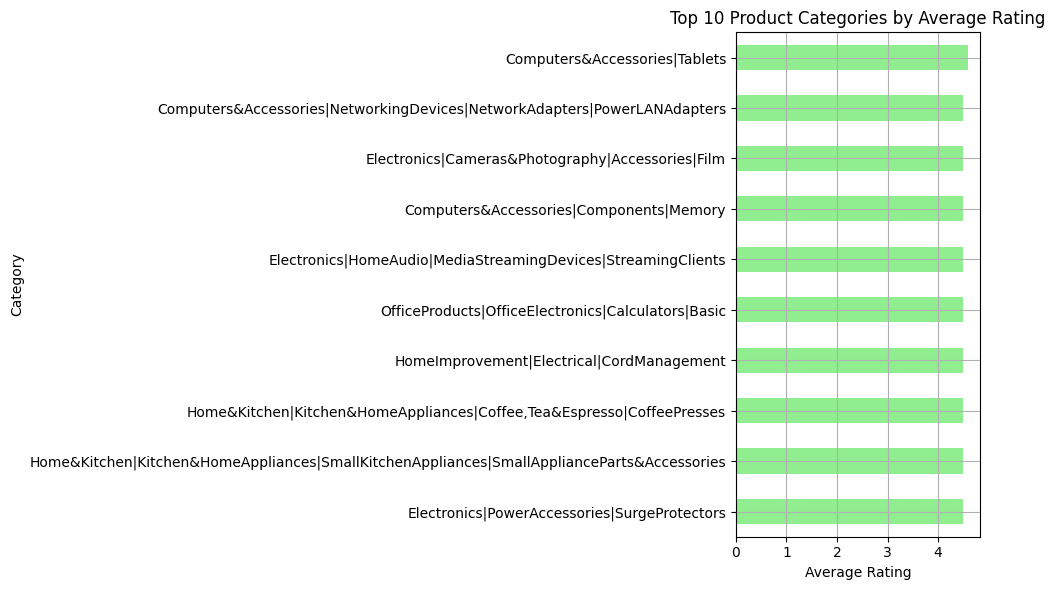

In [64]:
# Step 1: Convert 'rating' to numeric
df2['rating'] = pd.to_numeric(df2['rating'], errors='coerce')

# Step 2: Group by 'category' and calculate average rating
avg_rating = df2.groupby('category')['rating'].mean().sort_values(ascending=False)

# Step 3: Print the result
print("Average Rating by Product Category:")
print(avg_rating)

# Step 4: Visualize top 10 categories
avg_rating.head(10).plot(kind='barh', color='lightgreen', figsize=(10, 6))
plt.title('Top 10 Product Categories by Average Rating')
plt.xlabel('Average Rating')
plt.ylabel('Category')
plt.gca().invert_yaxis()
plt.grid(True)
plt.tight_layout()
plt.show()

Q2. What are the top rating_count products by category?

In [65]:
# Step 1: Clean 'rating_count' column (remove commas)
df2['rating_count'] = df2['rating_count'].str.replace(',', '')

# Handle potential NaN values created by previous cleaning or originally present
# Replace NaN with 0 before converting to integer
df2['rating_count'] = df2['rating_count'].fillna(0).astype(int)


# Step 2: For each category, find the product with the highest rating_count
top_rated_products = df2.loc[df2.groupby('category')['rating_count'].idxmax()][
    ['category', 'product_name', 'rating_count', 'rating']
].sort_values(by='rating_count', ascending=False)

# Step 3: Display result
print("Top Rating Count Products by Category:")
print(top_rated_products.head(20))  # show top 20 rows

Top Rating Count Products by Category:
                                               category  \
12    Electronics|HomeTheater,TV&Video|Accessories|C...   
352   Electronics|Headphones,Earbuds&Accessories|Hea...   
370   Electronics|Mobiles&Accessories|Smartphones&Ba...   
1028  Home&Kitchen|Kitchen&Dining|KitchenTools|Manua...   
588   Computers&Accessories|ExternalDevices&DataStor...   
864         Electronics|Accessories|MemoryCards|MicroSD   
143   Computers&Accessories|NetworkingDevices|Networ...   
337   Electronics|Mobiles&Accessories|MobileAccessor...   
191   Computers&Accessories|Accessories&Peripherals|...   
701   Computers&Accessories|NetworkingDevices|Repeat...   
345   Electronics|Mobiles&Accessories|Smartphones&Ba...   
1022  Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...   
736     Computers&Accessories|NetworkingDevices|Routers   
599   Electronics|Headphones,Earbuds&Accessories|Hea...   
691   Computers&Accessories|NetworkingDevices|Networ...   
719   Electronics

Q3. What is the distribution of discounted prices vs. actual prices?

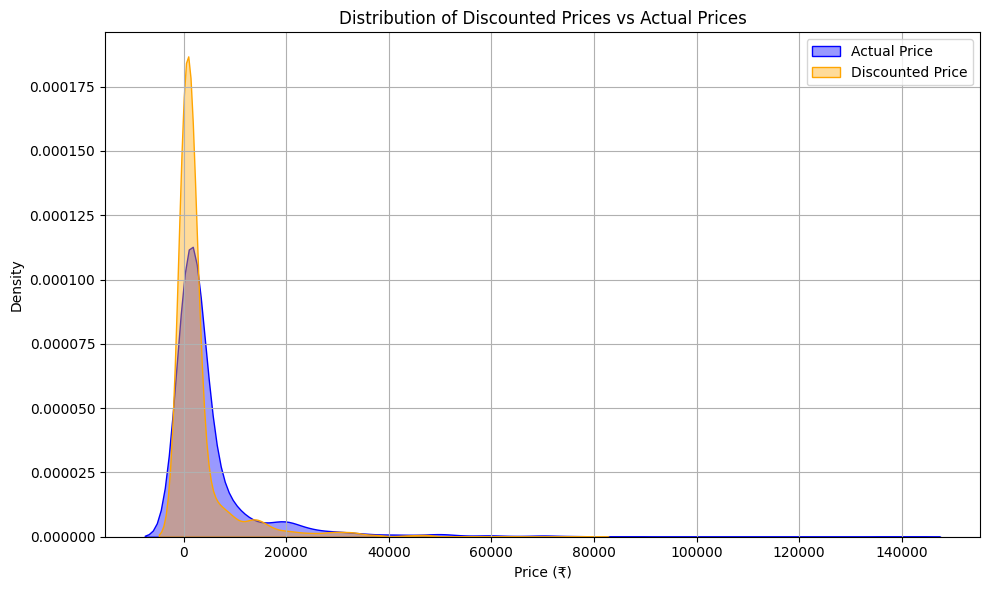

In [66]:
df2['discounted_price'] = df2['discounted_price'].str.replace('₹', '').str.replace(',', '').astype(float)
df2['actual_price'] = df2['actual_price'].str.replace('₹', '').str.replace(',', '').astype(float)

# Plot the distributions using KDE (density plot)
plt.figure(figsize=(10, 6))
sns.kdeplot(df2['actual_price'], fill=True, color='blue', alpha=0.4, label='Actual Price')
sns.kdeplot(df2['discounted_price'], fill=True, color='orange', alpha=0.4, label='Discounted Price')

plt.title('Distribution of Discounted Prices vs Actual Prices')
plt.xlabel('Price (₹)')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Q4. How does the average discount percentage vary across categories?

📊 Average Discount % by Category:
category
Computers&Accessories|Accessories&Peripherals|Cables&Accessories|CableConnectionProtectors                            90.090090
Electronics|Headphones,Earbuds&Accessories|Earpads                                                                    90.090090
Electronics|Mobiles&Accessories|MobileAccessories|Décor|PhoneCharms                                                   90.090090
Electronics|Headphones,Earbuds&Accessories|Adapters                                                                   87.987988
Computers&Accessories|Accessories&Peripherals|Keyboards,Mice&InputDevices|Keyboard&MiceAccessories|DustCovers         87.722505
                                                                                                                        ...    
OfficeProducts|OfficeElectronics|Calculators|Financial&Business                                                        0.000000
OfficeProducts|OfficePaperProducts|Paper|Copy&PrintingPaper|C

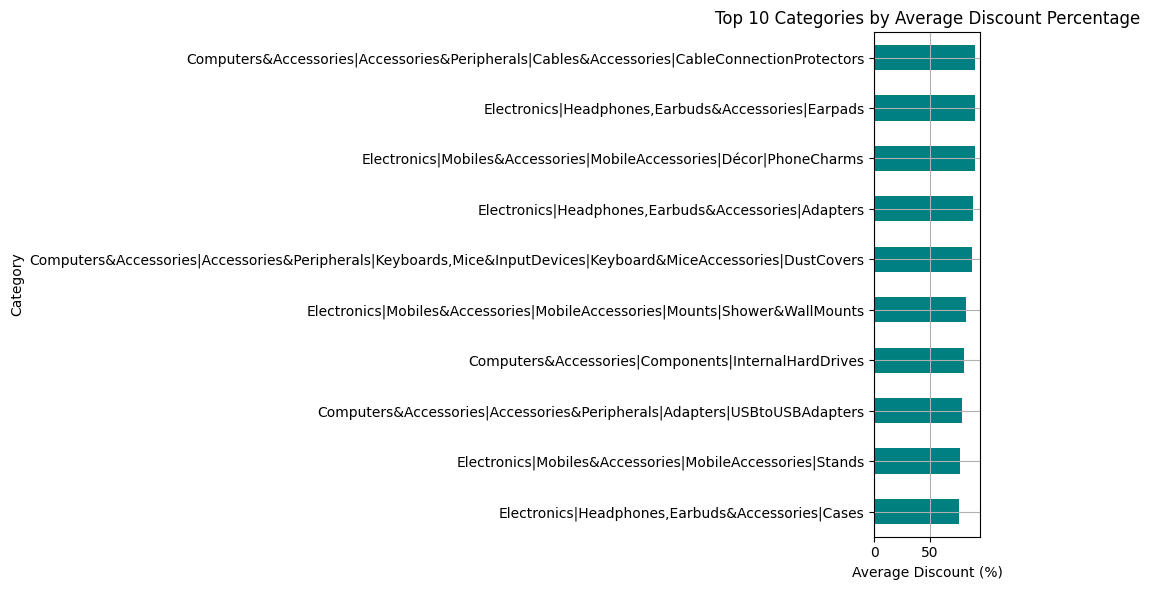

In [68]:
df2['discounted_price'] = df2['discounted_price'].astype(str).str.replace('₹', '', regex=False).str.replace(',', '', regex=False).astype(float)
df2['actual_price'] = df2['actual_price'].astype(str).str.replace('₹', '', regex=False).str.replace(',', '', regex=False).astype(float)

# Calculate discount %
df2['discount_pct_calc'] = ((df2['actual_price'] - df2['discounted_price']) / df2['actual_price']) * 100

# Group by category
avg_discount_by_cat = df2.groupby('category')['discount_pct_calc'].mean().sort_values(ascending=False)

# Show result
print("📊 Average Discount % by Category:")
print(avg_discount_by_cat)

# Plot
avg_discount_by_cat.head(10).plot(kind='barh', figsize=(10, 6), color='teal')
plt.title('Top 10 Categories by Average Discount Percentage')
plt.xlabel('Average Discount (%)')
plt.ylabel('Category')
plt.gca().invert_yaxis()
plt.grid(True)
plt.tight_layout()
plt.show()


Q5. What are the most popular product names?

/tmp/ipython-input-71-3812079055.py:6: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


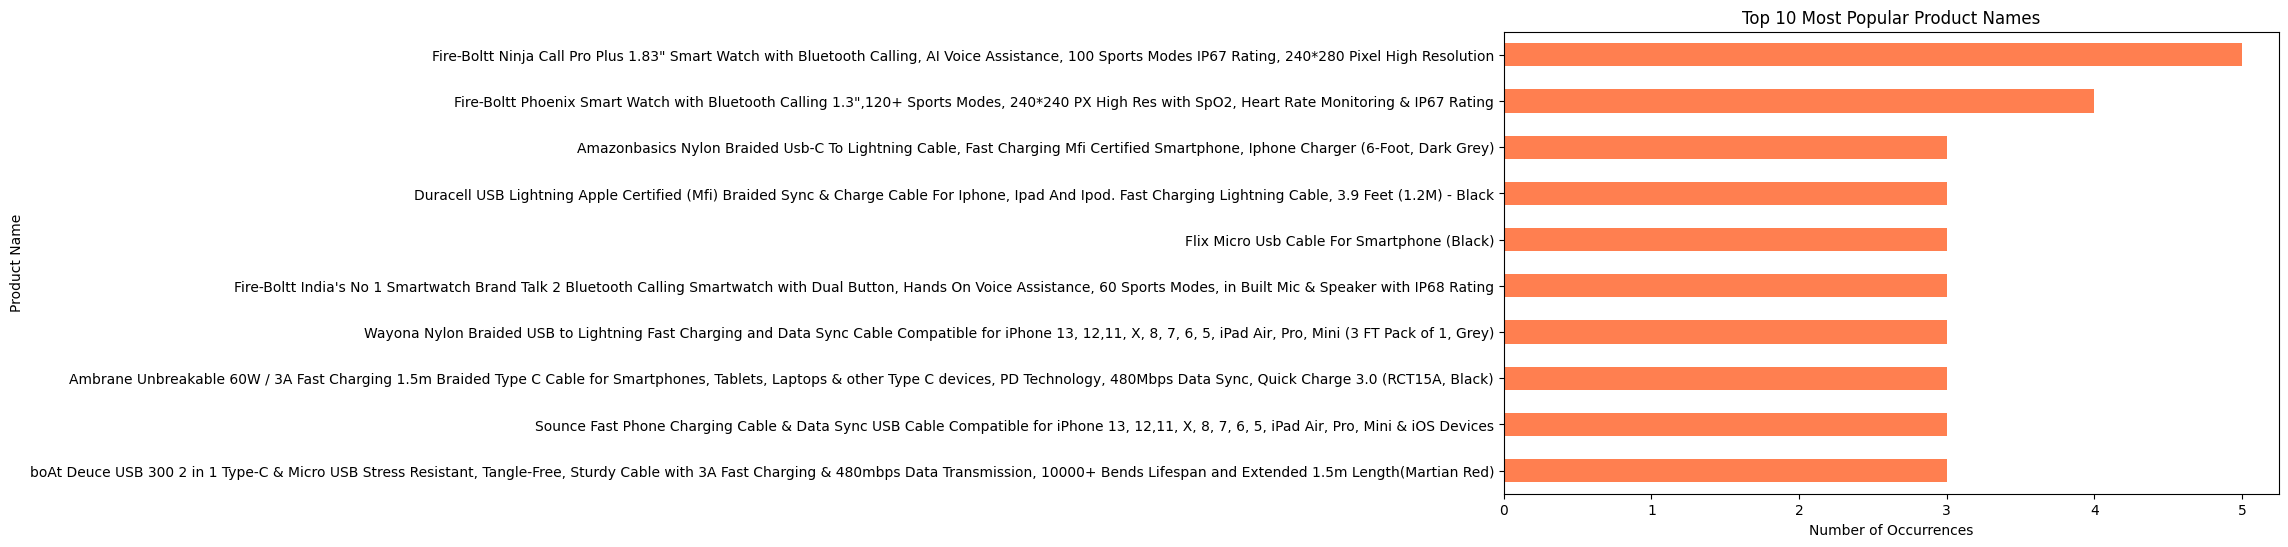

In [71]:
popular_products.plot(kind='barh', figsize=(10,6), color='coral')
plt.title('Top 10 Most Popular Product Names')
plt.xlabel('Number of Occurrences')
plt.ylabel('Product Name')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


Q6. What are the most popular product keywords?

🏆 Most Popular Product Keywords:
black: 467
cable: 401
usb: 389
charging: 246
fast: 211
smart: 172
white: 155
type: 148
compatible: 141
data: 135


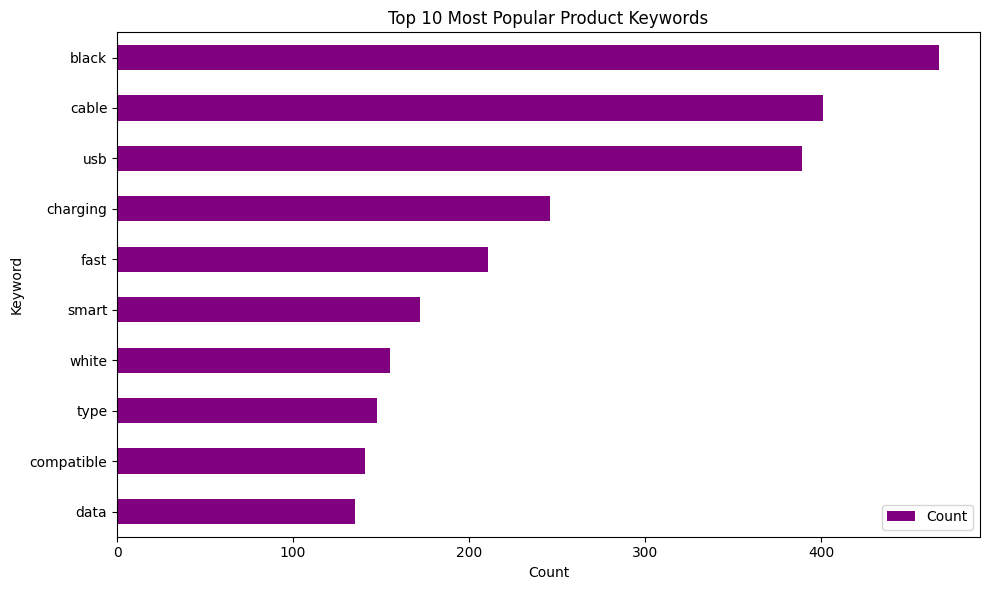

In [77]:
from collections import Counter # Import Counter

# Combine all product names into one large string
all_names = ' '.join(df2['product_name'].dropna().astype(str))

# Split into individual words
words = all_names.split()

# Optionally clean: remove short/common words
ignore_words = {'the', 'for', 'and', 'with', 'to', 'of', 'in', 'by', 'on', 'at', 'is', 'a', 'an'}
clean_words = [
    word.strip('.,()/-').lower()
    for word in words
    if word.lower() not in ignore_words and len(word) > 2]
word_counts = Counter(clean_words)

# Get top 10 most common keywords
common_keywords = word_counts.most_common(10)

# Display result
print("🏆 Most Popular Product Keywords:")
for word, count in common_keywords:
    print(f"{word}: {count}")

# Visualize
keywords_df = pd.DataFrame(common_keywords, columns=['Keyword', 'Count'])
keywords_df.set_index('Keyword').plot(kind='barh', color='purple', figsize=(10, 6))
plt.title('Top 10 Most Popular Product Keywords')
plt.xlabel('Count')
plt.ylabel('Keyword')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

Q7. What are the most popular product reviews?

In [80]:
import pandas as pd
# Ensure rating_count is string, clean commas, convert to int
df2['rating_count'] = df2['rating_count'].astype(str).str.replace(',', '', regex=False).astype(int)

# Now find top products by rating count
top_products = df2.sort_values('rating_count', ascending=False).head(10)

# Show product name, review content, and rating count
print("🏆 Top products by rating count and their review content:")
print(top_products[['product_name', 'review_content', 'rating_count']])


🏆 Top products by rating count and their review content:
                                          product_name  \
12   AmazonBasics Flexible Premium HDMI Cable (Blac...   
65   Amazon Basics High-Speed HDMI Cable, 6 Feet (2...   
47   Amazon Basics High-Speed HDMI Cable, 6 Feet - ...   
684  AmazonBasics Flexible Premium HDMI Cable (Blac...   
400  boAt Bassheads 100 in Ear Wired Earphones with...   
352  boAt Bassheads 100 in Ear Wired Earphones with...   
584  boAt BassHeads 100 in-Ear Wired Headphones wit...   
371  Redmi 9A Sport (Coral Green, 2GB RAM, 32GB Sto...   
370  Redmi 9 Activ (Carbon Black, 4GB RAM, 64GB Sto...   
566  Redmi 9A Sport (Coral Green, 3GB RAM, 32GB Sto...   

                                        review_content  rating_count  
12   I am using it for 14 days now. The experience ...        426973  
65   I am using it for 14 days now. The experience ...        426973  
47   I am using it for 14 days now. The experience ...        426973  
684  I am using it f

Q8.  What is the correlation between discounted_price and rating?

Correlation between discounted_price and rating: 0.120


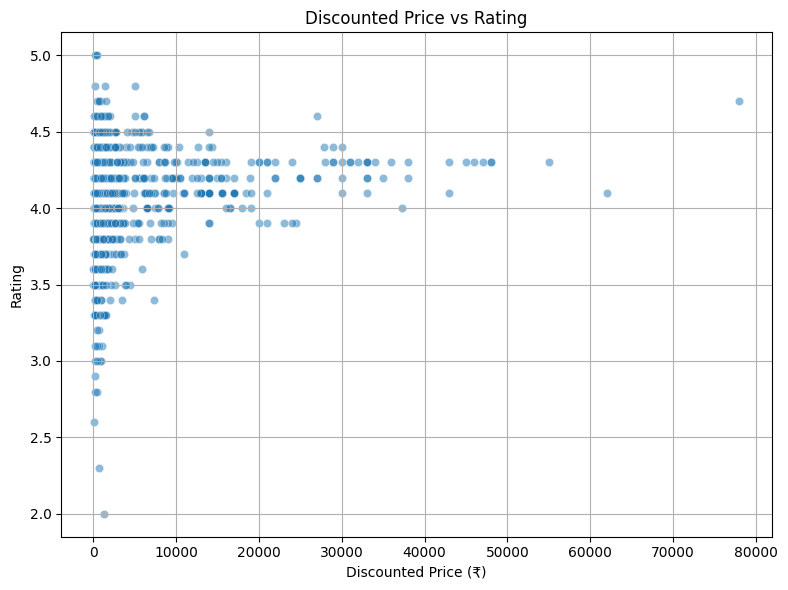

In [81]:
# Clean discounted_price: remove ₹ and commas, convert to float
df2['discounted_price'] = df2['discounted_price'].astype(str).str.replace('₹', '', regex=False).str.replace(',', '', regex=False).astype(float)

# Clean rating: convert to float (in case it's read as string)
df2['rating'] = df2['rating'].astype(float)

# Drop rows with missing discounted_price or rating
df_clean = df2.dropna(subset=['discounted_price', 'rating'])

# Compute correlation
correlation = df_clean['discounted_price'].corr(df_clean['rating'])
print(f"Correlation between discounted_price and rating: {correlation:.3f}")

# Visualize
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_clean, x='discounted_price', y='rating', alpha=0.5)
plt.title('Discounted Price vs Rating')
plt.xlabel('Discounted Price (₹)')
plt.ylabel('Rating')
plt.grid(True)
plt.tight_layout()
plt.show()

Q9.  What are the Top 5 categories based on the highest rating?

In [82]:
# Ensure rating is numeric
df2['rating'] = df2['rating'].astype(float)

# Group by category and compute average rating
avg_rating_by_category = df2.groupby('category')['rating'].mean().sort_values(ascending=False)

# Get top 5
top_5_categories = avg_rating_by_category.head(5)

# Display result
print("🏆 Top 5 Categories Based on Highest Average Rating:")
print(top_5_categories)

🏆 Top 5 Categories Based on Highest Average Rating:
category
Computers&Accessories|Tablets                                               4.6
Computers&Accessories|NetworkingDevices|NetworkAdapters|PowerLANAdapters    4.5
Electronics|Cameras&Photography|Accessories|Film                            4.5
Computers&Accessories|Components|Memory                                     4.5
Electronics|HomeAudio|MediaStreamingDevices|StreamingClients                4.5
Name: rating, dtype: float64


Q10.  Identify any potential areas for improvement or optimization based on the data analysis.

 Correlation between discounted price and rating: 0.120

 Categories with highest avg discount %:
 category
Computers&Accessories|Accessories&Peripherals|Cables&Accessories|CableConnectionProtectors                       90.090090
Electronics|Headphones,Earbuds&Accessories|Earpads                                                               90.090090
Electronics|Mobiles&Accessories|MobileAccessories|Décor|PhoneCharms                                              90.090090
Electronics|Headphones,Earbuds&Accessories|Adapters                                                              87.987988
Computers&Accessories|Accessories&Peripherals|Keyboards,Mice&InputDevices|Keyboard&MiceAccessories|DustCovers    87.722505
Name: discount_pct_calc, dtype: float64

 Categories with highest avg rating:
 category
Computers&Accessories|Tablets                                               4.6
Computers&Accessories|NetworkingDevices|NetworkAdapters|PowerLANAdapters    4.5
Electronics|Cameras&Photograp

/tmp/ipython-input-83-298734372.py:40: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


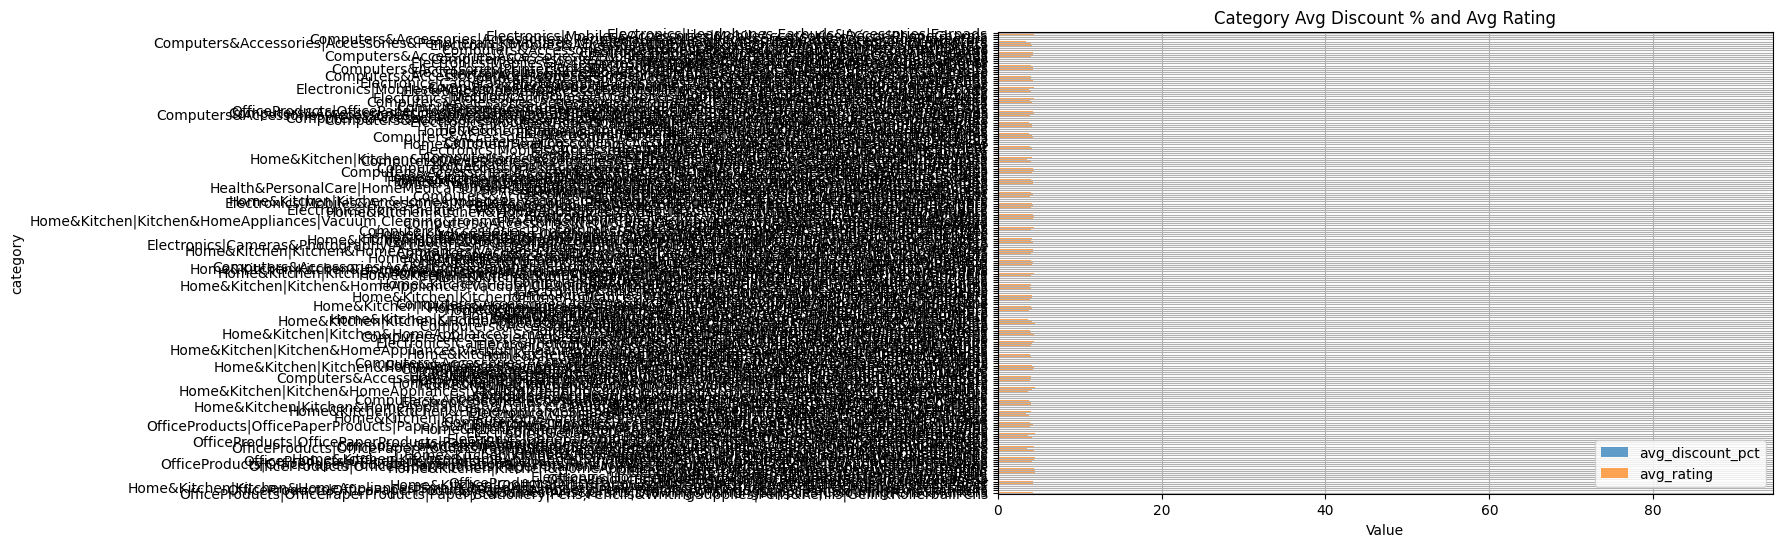

In [83]:
# Clean prices
df2['discounted_price'] = df2['discounted_price'].astype(str).str.replace('₹','', regex=False).str.replace(',','', regex=False).astype(float)
df2['actual_price'] = df2['actual_price'].astype(str).str.replace('₹','', regex=False).str.replace(',','', regex=False).astype(float)

# Clean ratings
df2['rating'] = df2['rating'].astype(float)

# Clean rating_count
df2['rating_count'] = df2['rating_count'].astype(str).str.replace(',','', regex=False).astype(int)

# Compute discount %
df2['discount_pct_calc'] = ((df2['actual_price'] - df2['discounted_price']) / df2['actual_price']) * 100

# 1️ Correlation between price and rating
price_rating_corr = df2[['discounted_price', 'rating']].corr().iloc[0,1]
print(f" Correlation between discounted price and rating: {price_rating_corr:.3f}")

# 2️ Avg discount % per category
avg_discount = df2.groupby('category')['discount_pct_calc'].mean().sort_values(ascending=False)
print("\n Categories with highest avg discount %:\n", avg_discount.head())

# 3️ Avg rating per category
avg_rating = df2.groupby('category')['rating'].mean().sort_values(ascending=False)
print("\n Categories with highest avg rating:\n", avg_rating.head())

# 4️ Categories with high discount but low rating
result = pd.concat([avg_discount, avg_rating], axis=1)
result.columns = ['avg_discount_pct', 'avg_rating']
result['alert'] = (result['avg_discount_pct'] > result['avg_discount_pct'].mean()) & (result['avg_rating'] < result['avg_rating'].mean())
print("\n Categories with high discount but low avg rating (needs review):\n", result[result['alert']])

# 5️ Visualize discount vs rating across categories
result.sort_values('avg_discount_pct').plot(
    kind='barh', y=['avg_discount_pct', 'avg_rating'],
    figsize=(10,6), alpha=0.7
)
plt.title('Category Avg Discount % and Avg Rating')
plt.xlabel('Value')
plt.grid(True)
plt.tight_layout()
plt.show()

## EDA - 4 spotify

In [84]:
df3 = pd.read_csv('spotify.csv')
print(df3)

             Artist                                         Track Name  \
0             Drake            Rich Baby Daddy (feat. Sexyy Red & SZA)   
1             Drake                                          One Dance   
2             Drake                                 IDGAF (feat. Yeat)   
3             Drake               First Person Shooter (feat. J. Cole)   
4             Drake                      Jimmy Cooks (feat. 21 Savage)   
..              ...                                                ...   
435  French Montana                                    Splash Brothers   
436         Fat Joe                     All The Way Up (feat. Infared)   
437       A$AP Ferg  Work REMIX (feat. A$AP Rocky, French Montana, ...   
438           Diddy                Another One Of Me (feat. 21 Savage)   
439       Rick Ross                                       Stay Schemin   

     Popularity  Duration (ms)                Track ID  
0            92         319191  1yeB8MUNeLo9Ek1UEpsyz6

Q1. Read the dataframe, check null value if present then do the needful, check duplicate row , if present then do
the needful.

In [85]:
# Step 2: Check initial shape
print("Initial shape:", df3.shape)

# Step 3: Check for null values
print("\nNull values in each column:")
print(df3.isnull().sum())

# Handle nulls: Drop rows with any null values
df3_clean = df3.dropna()
print("\nShape after dropping nulls:", df3_clean.shape)

# Step 4: Check for duplicates
duplicates = df3_clean.duplicated().sum()
print("\nNumber of duplicate rows:", duplicates)

# Remove duplicates
df3_clean = df3_clean.drop_duplicates()
print("Shape after dropping duplicates:", df3_clean.shape)

# Step 5: Preview cleaned data
print("\nSample cleaned data:")
print(df3_clean.head())



Initial shape: (440, 5)

Null values in each column:
Artist           0
Track Name       0
Popularity       0
Duration (ms)    0
Track ID         0
dtype: int64

Shape after dropping nulls: (440, 5)

Number of duplicate rows: 27
Shape after dropping duplicates: (413, 5)

Sample cleaned data:
  Artist                               Track Name  Popularity  Duration (ms)  \
0  Drake  Rich Baby Daddy (feat. Sexyy Red & SZA)          92         319191   
1  Drake                                One Dance          91         173986   
2  Drake                       IDGAF (feat. Yeat)          90         260111   
3  Drake     First Person Shooter (feat. J. Cole)          88         247444   
4  Drake            Jimmy Cooks (feat. 21 Savage)          88         218364   

                 Track ID  
0  1yeB8MUNeLo9Ek1UEpsyz6  
1  1zi7xx7UVEFkmKfv06H8x0  
2  2YSzYUF3jWqb9YP9VXmpjE  
3  7aqfrAY2p9BUSiupwk3svU  
4  3F5CgOj3wFlRv51JsHbxhe  


Q2. What is the distribution of popularity among the tracks in the dataset? Visualize it using a histogram.

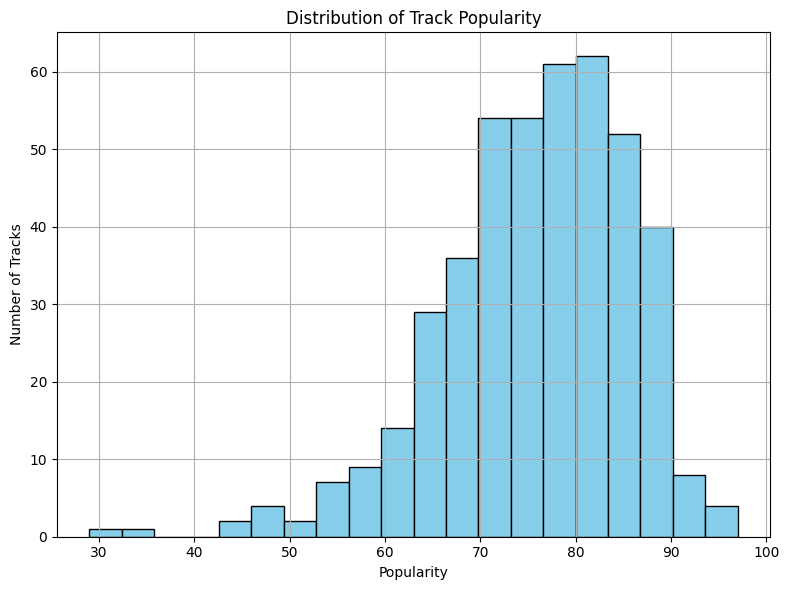

In [86]:
plt.figure(figsize=(8, 6))
plt.hist(df3['Popularity'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Track Popularity')
plt.xlabel('Popularity')
plt.ylabel('Number of Tracks')
plt.grid(True)
plt.tight_layout()
plt.show()

Q3. Is there any relationship between the popularity and the duration of tracks? Explore this using a scatter plot.

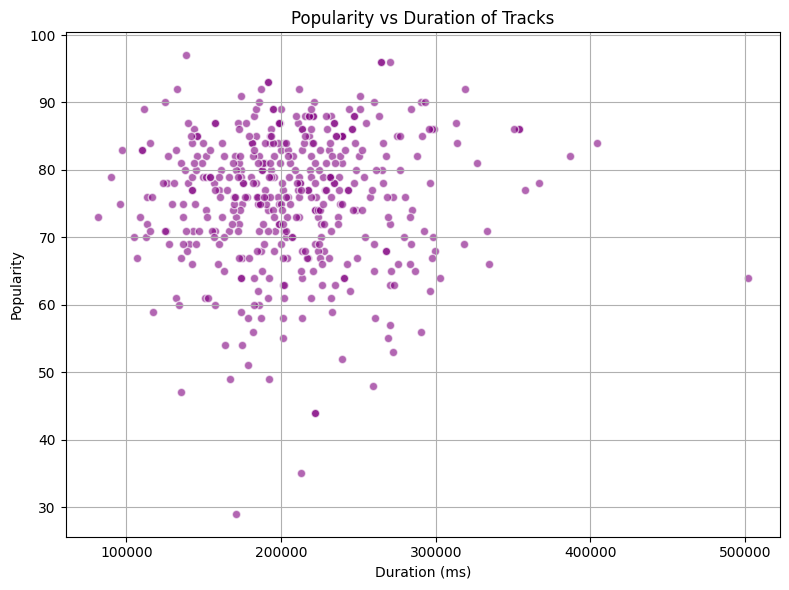

In [87]:
plt.figure(figsize=(8, 6))
plt.scatter(df3['Duration (ms)'], df3['Popularity'], alpha=0.6, color='purple', edgecolors='w')
plt.title('Popularity vs Duration of Tracks')
plt.xlabel('Duration (ms)')
plt.ylabel('Popularity')
plt.grid(True)
plt.tight_layout()
plt.show()

Q4. Which artist has the highest number of tracks in the dataset? Display the count of tracks for each artist using
a countplot.

Artist with the highest number of tracks: Drake (20 tracks)


/tmp/ipython-input-88-3681626092.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Artist', data=df3, order=artist_counts.index[:10], palette='viridis')


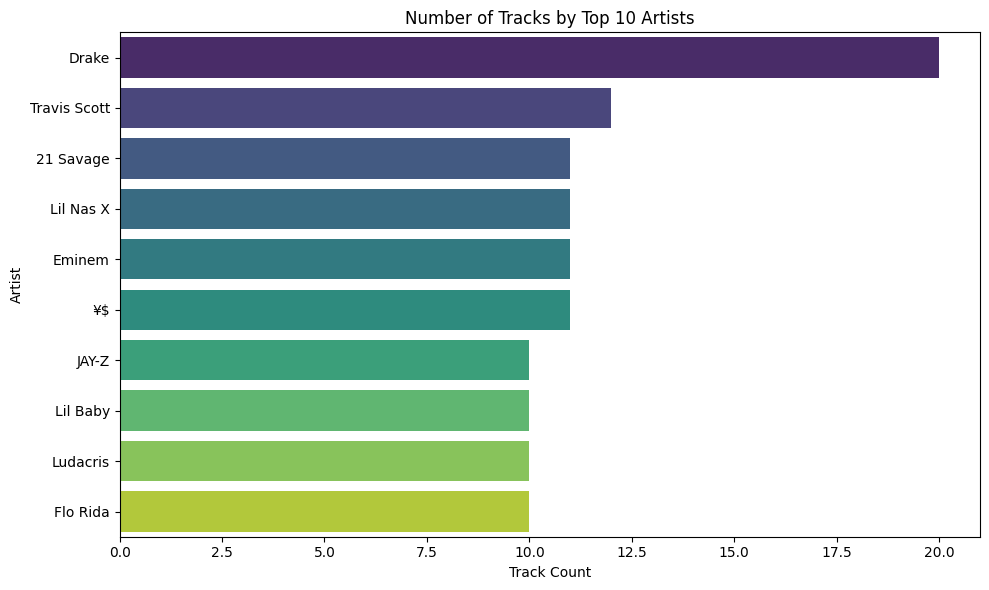

In [88]:
artist_counts = df3['Artist'].value_counts()

# Display the artist with the highest number of tracks
top_artist = artist_counts.idxmax()
top_count = artist_counts.max()
print(f"Artist with the highest number of tracks: {top_artist} ({top_count} tracks)")

# Plot count of tracks per artist (top 10 for readability)
plt.figure(figsize=(10, 6))
sns.countplot(y='Artist', data=df3, order=artist_counts.index[:10], palette='viridis')
plt.title('Number of Tracks by Top 10 Artists')
plt.xlabel('Track Count')
plt.ylabel('Artist')
plt.tight_layout()
plt.show()

Q5. What are the top 5 least popular tracks in the dataset? Provide the artist name and track name for each.

In [89]:
# Sort by Popularity ascending (least popular first)
least_popular_tracks = df3.sort_values(by='Popularity').head(5)

# Display the result
print("Top 5 least popular tracks:")
print(least_popular_tracks[['Artist', 'Track Name', 'Popularity']])

Top 5 least popular tracks:
             Artist                     Track Name  Popularity
207          Pressa  Attachments (feat. Coi Leray)          29
231   Justin Bieber                     Intentions          35
413  French Montana                Splash Brothers          44
435  French Montana                Splash Brothers          44
225        Lil Baby                  On Me - Remix          47


Q6. Among the top 5 most popular artists, which artist has the highest popularity on average? Calculate and
display the average popularity for each artist.

In [90]:
# Step 1: Find top 5 artists by track count
top_artists = df3['Artist'].value_counts().head(5).index

# Step 2: Filter dataset for these artists
df_top_artists = df3[df3['Artist'].isin(top_artists)]

# Step 3: Calculate average popularity for each artist
avg_popularity = df_top_artists.groupby('Artist')['Popularity'].mean().sort_values(ascending=False)

# Display results
print("Average popularity of top 5 artists (by track count):")
print(avg_popularity)

# Show the artist with the highest average popularity
best_artist = avg_popularity.idxmax()
best_popularity = avg_popularity.max()
print(f"\nArtist with highest average popularity: {best_artist} ({best_popularity:.2f})")

Average popularity of top 5 artists (by track count):
Artist
Travis Scott    87.000000
21 Savage       84.181818
Eminem          83.636364
Drake           83.500000
Lil Nas X       76.090909
Name: Popularity, dtype: float64

Artist with highest average popularity: Travis Scott (87.00)


Q7. For the top 5 most popular artists, what are their most popular tracks? List the track name for each artist.

In [91]:
# Step 1: Calculate average popularity for each artist
artist_avg_popularity = df3.groupby('Artist')['Popularity'].mean().sort_values(ascending=False)

# Step 2: Get top 5 most popular artists by avg popularity
top5_artists = artist_avg_popularity.head(5).index

# Step 3: For each artist, find their most popular track
print("Most popular track for each of the top 5 artists:")
for artist in top5_artists:
    artist_tracks = df3[df3['Artist'] == artist]
    top_track = artist_tracks.loc[artist_tracks['Popularity'].idxmax()]
    print(f"{artist}: {top_track['Track Name']} (Popularity: {top_track['Popularity']})")

Most popular track for each of the top 5 artists:
cassö: Prada (Popularity: 92)
Trueno: Mamichula - con Nicki Nicole (Popularity: 89)
David Guetta: Baby Don't Hurt Me (Popularity: 87)
Travis Scott: FE!N (feat. Playboi Carti) (Popularity: 93)
¥$: CARNIVAL (Popularity: 96)


Q8. Visualize relationships between multiple numerical variables simultaneously using a pair plot.

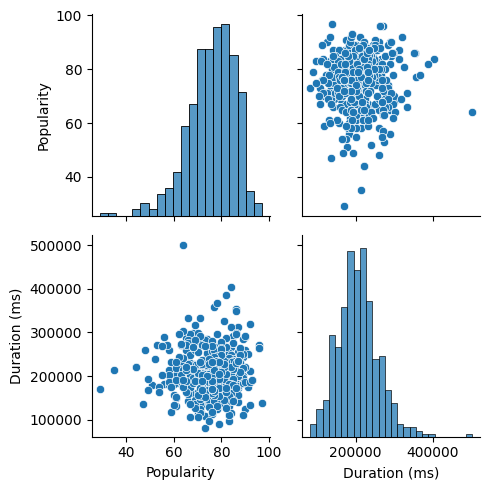

In [92]:
# Select numeric columns
num_cols = ['Popularity', 'Duration (ms)']

# Create pair plot
sns.pairplot(df3[num_cols], diag_kind='hist')
plt.tight_layout()
plt.show()

Q9.  Does the duration of tracks vary significantly across different artists? Explore this visually using a box plot or
violin plot.

/tmp/ipython-input-93-1173426607.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Artist', y='Duration (ms)', data=df_top, palette='Set2')


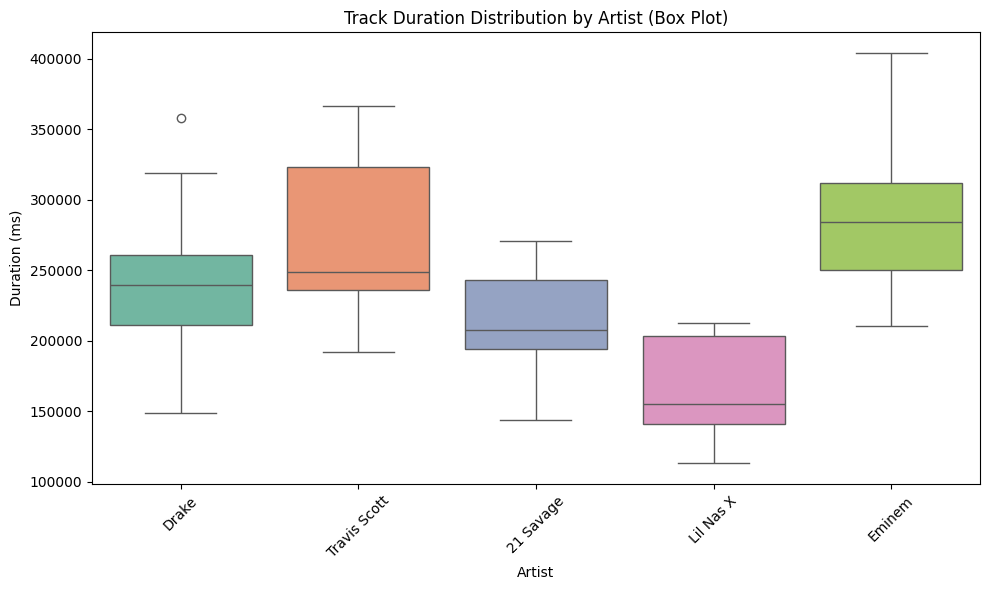

/tmp/ipython-input-93-1173426607.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Artist', y='Duration (ms)', data=df_top, palette='Set2')


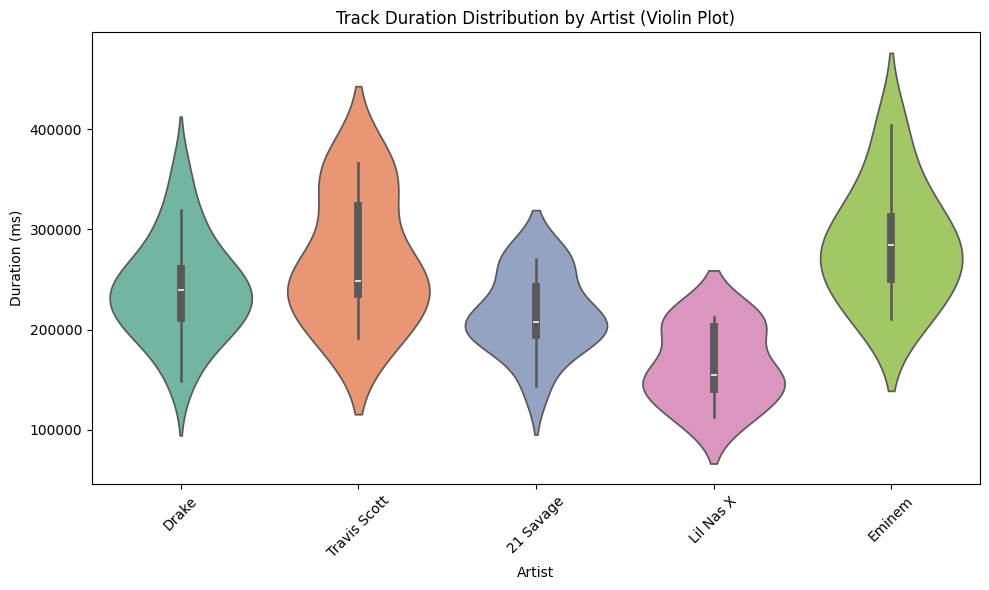

In [93]:
# Select top 5 artists by number of tracks for clearer plots
top_artists = df3['Artist'].value_counts().head(5).index
df_top = df3[df3['Artist'].isin(top_artists)]

# Box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Artist', y='Duration (ms)', data=df_top, palette='Set2')
plt.title('Track Duration Distribution by Artist (Box Plot)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(x='Artist', y='Duration (ms)', data=df_top, palette='Set2')
plt.title('Track Duration Distribution by Artist (Violin Plot)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Q10. How does the distribution of track popularity vary for different artists? Visualize this using a swarm plot or a
violin plot.

/tmp/ipython-input-94-3696992703.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Artist', y='Popularity', data=df_top, palette='Set2')


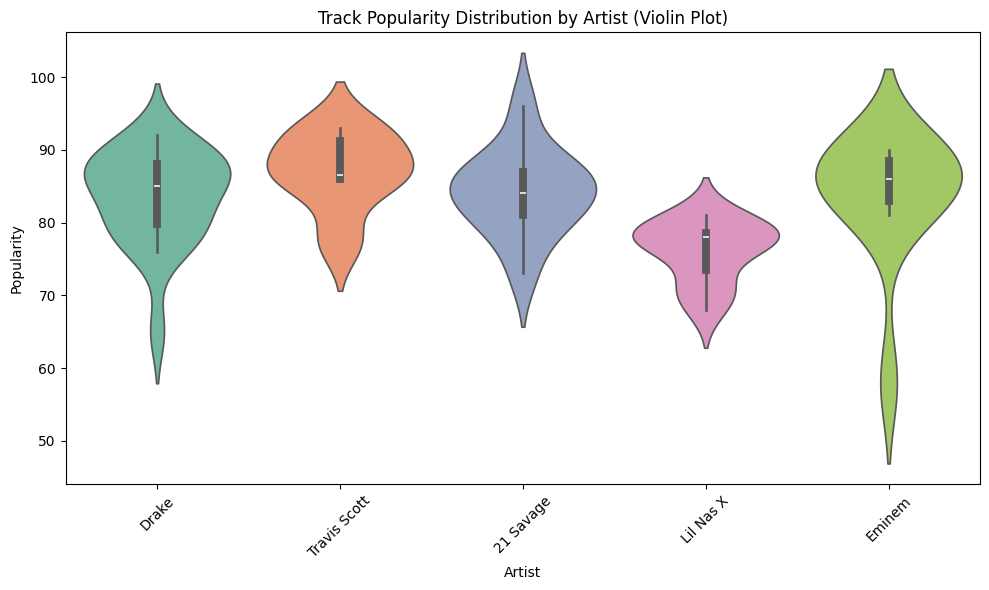

/tmp/ipython-input-94-3696992703.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(x='Artist', y='Popularity', data=df_top, palette='Set2', size=4)


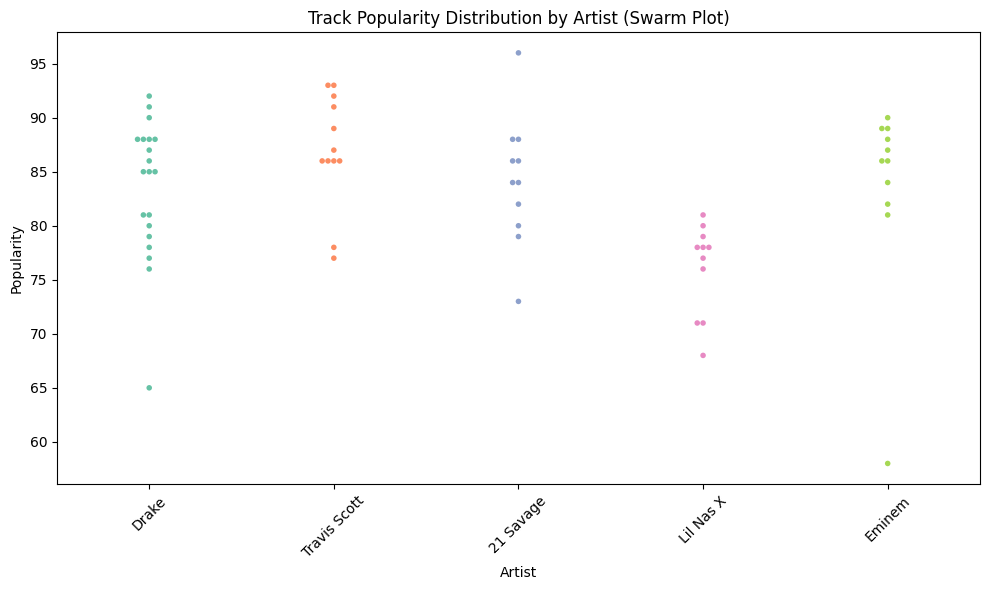

In [94]:
# Select top 5 artists by number of tracks for readability
top_artists = df3['Artist'].value_counts().head(5).index
df_top = df3[df3['Artist'].isin(top_artists)]

# Violin plot for popularity distribution
plt.figure(figsize=(10, 6))
sns.violinplot(x='Artist', y='Popularity', data=df_top, palette='Set2')
plt.title('Track Popularity Distribution by Artist (Violin Plot)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Swarm plot for popularity distribution
plt.figure(figsize=(10, 6))
sns.swarmplot(x='Artist', y='Popularity', data=df_top, palette='Set2', size=4)
plt.title('Track Popularity Distribution by Artist (Swarm Plot)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()